In [1]:
import pandas as pd
import numpy as np
import sqlite3
import os

In [2]:
# import csv file
df = pd.read_csv('Sample-Superstore_cleaned.csv', sep=',', encoding='utf-8', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row_id                9994 non-null   int64  
 1   order_id              9994 non-null   object 
 2   order_date            9994 non-null   object 
 3   year                  9994 non-null   int64  
 4   month                 9994 non-null   int64  
 5   day_of_week           9994 non-null   object 
 6   ship_date             9994 non-null   object 
 7   ship_mode             9994 non-null   object 
 8   customer_id           9994 non-null   object 
 9   customer_name         9994 non-null   object 
 10  segment               9994 non-null   object 
 11  customer_address_key  9994 non-null   object 
 12  country               9994 non-null   object 
 13  city                  9994 non-null   object 
 14  state                 9994 non-null   object 
 15  postal_code          

FURTHER ENRICHING OF BASE DATA

In [3]:
# Change ship_date to datetime format
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%Y-%m-%d')
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   row_id                9994 non-null   int64         
 1   order_id              9994 non-null   object        
 2   order_date            9994 non-null   datetime64[ns]
 3   year                  9994 non-null   int64         
 4   month                 9994 non-null   int64         
 5   day_of_week           9994 non-null   object        
 6   ship_date             9994 non-null   datetime64[ns]
 7   ship_mode             9994 non-null   object        
 8   customer_id           9994 non-null   object        
 9   customer_name         9994 non-null   object        
 10  segment               9994 non-null   object        
 11  customer_address_key  9994 non-null   object        
 12  country               9994 non-null   object        
 13  city              

In [4]:
# generate new column 'sales_without_discount' by taking per row the value in 'price' multiply with value in 'discount' and multiply with value in 'quantity' and then add value in 'sales' 
df['sales_without_discount'] = (df['price'] * df['discount'] * df['quantity']) + df['sales']

# Target : get purchase price for each row-id
# Step 1: Take number in 'profit' and divide by number in 'quantity'
# Step 2: Take number in 'discount' and multiply by number in 'price'
# Step 3: Add the result of Step1 and Step 2 together AND multiply this sum with value in 'quantity', then save result as value in new column 'profit_without_discount'
# Step 4: Add the result of Step1 and Step 2 together AND substract it from value in column 'price', then save the result in a new column 'purchase_price' and insert this column after existing column 'price'  
# Step 1: Calculate profit per unit
profit_per_unit = df['profit'] / df['quantity']

# Step 2: Calculate discount impact per unit
discount_impact_per_unit = df['discount'] * df['price']

# Step 3: Calculate profit_without_discount
df['profit_without_discount'] = (profit_per_unit + discount_impact_per_unit) * df['quantity']

# Step 4: Calculate purchase_price and insert it after 'price' column
df.insert(df.columns.get_loc('price') + 1, 'purchase_price', df['price'] - (profit_per_unit + discount_impact_per_unit))

# Add a new column at the end of the dataframe with Y/N values if discount is greater than 0
df['discounted_sale'] = np.where(df['discount'] > 0, 'Y', 'N')

df

,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,product_name,price,purchase_price,sales,quantity,discount,profit,sales_without_discount,profit_without_discount,discounted_sale
0,1,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,Bush Somerset Collection Bookcase,130.98,110.0232,261.9600,2,0.00,41.9136,261.96,41.9136,N
1,2,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",243.98,170.7860,731.9400,3,0.00,219.5820,731.94,219.5820,N
2,3,CA-2016-138688,2016-06-12,2016,6,Sunday,2016-06-16,Second Class,DV-13045,Darrin Van Huff,...,Self-Adhesive Address Labels for Typewriters b...,7.31,3.8743,14.6200,2,0.00,6.8714,14.62,6.8714,N
3,4,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,Bretford CR4500 Series Slim Rectangular Table,348.21,268.1217,957.5775,5,0.45,-383.0310,1741.05,400.4415,Y
4,5,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,Eldon Fold 'N Roll Cart System,13.98,9.9258,22.3680,2,0.20,2.5164,27.96,8.1084,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014,1,Tuesday,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,...,Ultra Door Pull Handle,10.52,7.0484,25.2480,3,0.20,4.1028,31.56,10.4148,Y
9990,9991,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,45.98,38.1634,91.9600,2,0.00,15.6332,91.96,15.6332,N
9991,9992,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,Aastra 57i VoIP phone,161.61,119.5914,258.5760,2,0.20,19.3932,323.22,84.0372,Y
9992,9993,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",7.40,4.0700,29.6000,4,0.00,13.3200,29.60,13.3200,N


In [5]:
# rename existing column 'price' to 'selling_price'
df.rename(columns={'price': 'selling_price'}, inplace=True)


df

,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,product_name,selling_price,purchase_price,sales,quantity,discount,profit,sales_without_discount,profit_without_discount,discounted_sale
0,1,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,Bush Somerset Collection Bookcase,130.98,110.0232,261.9600,2,0.00,41.9136,261.96,41.9136,N
1,2,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",243.98,170.7860,731.9400,3,0.00,219.5820,731.94,219.5820,N
2,3,CA-2016-138688,2016-06-12,2016,6,Sunday,2016-06-16,Second Class,DV-13045,Darrin Van Huff,...,Self-Adhesive Address Labels for Typewriters b...,7.31,3.8743,14.6200,2,0.00,6.8714,14.62,6.8714,N
3,4,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,Bretford CR4500 Series Slim Rectangular Table,348.21,268.1217,957.5775,5,0.45,-383.0310,1741.05,400.4415,Y
4,5,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,Eldon Fold 'N Roll Cart System,13.98,9.9258,22.3680,2,0.20,2.5164,27.96,8.1084,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014,1,Tuesday,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,...,Ultra Door Pull Handle,10.52,7.0484,25.2480,3,0.20,4.1028,31.56,10.4148,Y
9990,9991,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,45.98,38.1634,91.9600,2,0.00,15.6332,91.96,15.6332,N
9991,9992,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,Aastra 57i VoIP phone,161.61,119.5914,258.5760,2,0.20,19.3932,323.22,84.0372,Y
9992,9993,CA-2017-121258,2017-02-26,2017,2,Sunday,2017-03-03,Standard Class,DB-13060,Dave Brooks,...,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",7.40,4.0700,29.6000,4,0.00,13.3200,29.60,13.3200,N


In [6]:
# export the dataframe to a new csv file
# df.to_csv('Sample-Superstore_cleaned2.csv', index=False)

GRAPHICAL ANALYSIS AS PART OF EDA

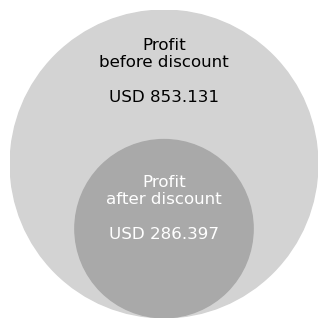

In [7]:
# Create a chart with two circles
# Circle 1 = radius of circle should us total sum of all values in column 'profit_without_discount'
# Circle 2 = radius of circle should us total sum of all values in column 'profit'
# I want Circle 1 to be on the back. Circle 2 should be inside Circle 1. At the bottom middle circle 2 should not intersect with outer line of circle 1. Circle 2 should be a bit away from outer line. Also Circle 2 and circle 1 should be aligned horizontically.
# Circle 2 should have color darkgrey. Circle 1 should have color lightgrey.

import matplotlib.pyplot as plt

# Calculate the radii of the circles
radius_circle1 = df['profit_without_discount'].sum() ** 0.5
radius_circle2 = df['profit'].sum() ** 0.5

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 4))

# Add Circle 1 (light grey, in the back)
circle1 = plt.Circle((0, 0), radius_circle1, color='lightgrey', zorder=1)
ax.add_artist(circle1)

# Add Circle 2 (dark grey, inside Circle 1)
circle2 = plt.Circle((0, -radius_circle1 + radius_circle2 + 0.1), radius_circle2, color='darkgrey', zorder=2)
ax.add_artist(circle2)

# Set limits and aspect ratio
ax.set_xlim(-radius_circle1 - 1, radius_circle1 + 1)
ax.set_ylim(-radius_circle1 - 1, radius_circle1 + 1)
ax.set_aspect('equal')
# Add labels inside the circles
ax.text(0, radius_circle2 * -0.5, 
    f"Profit\nafter discount\n\nUSD {int(df['profit'].sum()):,}".replace(",", "."), 
    color='white', ha='center', va='center', fontsize=12, zorder=3)
ax.text(0, radius_circle1 * 0.6, 
    f"Profit\nbefore discount\n\nUSD {int(df['profit_without_discount'].sum()):,}".replace(",", "."), 
    color='black', ha='center', va='center', fontsize=12, zorder=2)
# Remove axes for better visualization
ax.axis('off')

# Show the plot
plt.show()

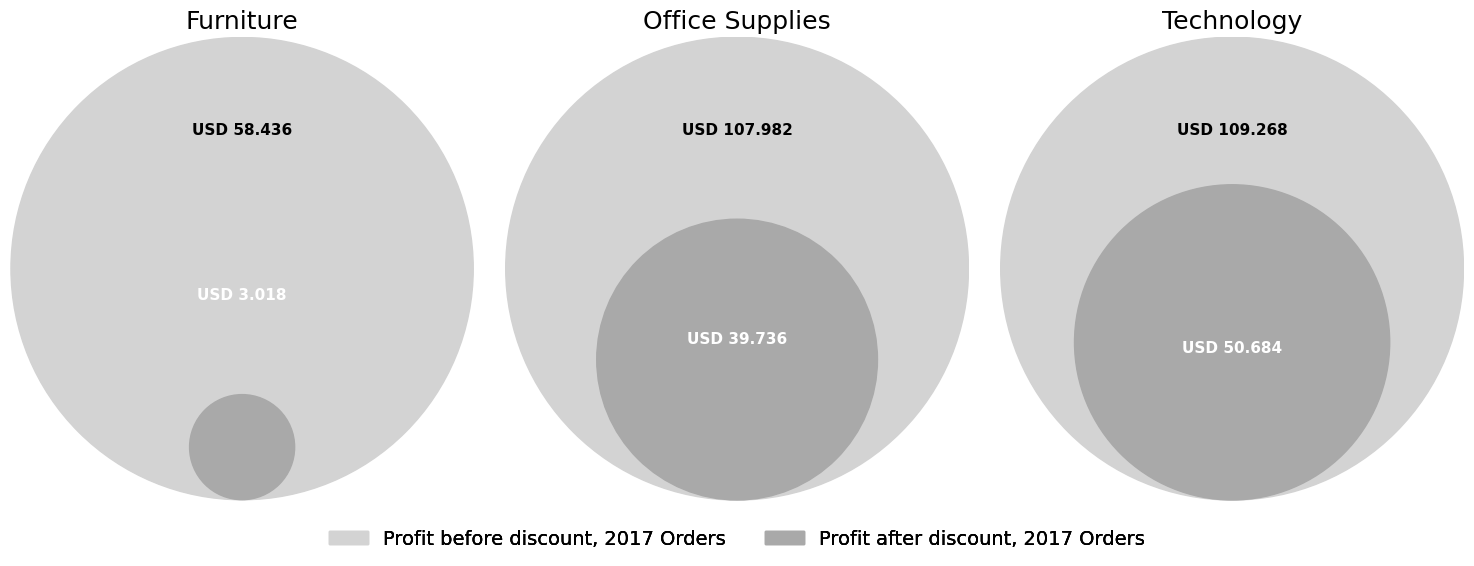

In [8]:
import matplotlib.pyplot as plt

# Limit data from dataframe df to year = '2017'
df_2017 = df[df['year'] == 2017]

# Define the main categories
categories = ['Furniture', 'Office Supplies', 'Technology']

# Create a figure with three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each category and create a separate plot
for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = df_2017[df_2017['category'] == category]
    
    # Calculate the radii of the circles
    radius_circle1 = category_data['profit_without_discount'].sum() ** 0.5
    radius_circle2 = category_data['profit'].sum() ** 0.5

    # Add Circle 1 (light grey, in the back)
    circle1 = plt.Circle((0, 0), radius_circle1, color='lightgrey', zorder=1)
    axes[i].add_artist(circle1)

    # Add Circle 2 (dark grey, inside Circle 1)
    circle2 = plt.Circle((0, -radius_circle1 + radius_circle2 + 0.1), radius_circle2, color='darkgrey', zorder=2)
    axes[i].add_artist(circle2)

    # Set limits and aspect ratio
    axes[i].set_xlim(-radius_circle1 - 1, radius_circle1 + 1)
    axes[i].set_ylim(-radius_circle1 - 1, radius_circle1 + 1)
    axes[i].set_aspect('equal')

    # Add labels inside the circles
    axes[i].text(0, radius_circle2 * -0.5, 
        f"USD {int(category_data['profit'].sum()):,}".replace(",", "."), 
        color='white', ha='center', va='center', fontsize=11, fontweight='bold', zorder=3)
    axes[i].text(0, radius_circle1 * 0.6, 
        f"USD {int(category_data['profit_without_discount'].sum()):,}".replace(",", "."), 
        color='black', ha='center', va='center', fontsize=11, fontweight='bold', zorder=2)

    # Remove axes for better visualization
    axes[i].axis('off')

    # Add a title for each subplot
    axes[i].set_title(category, fontsize=18, fontweight='normal', color='black')
    # Add a legend below the whole plot
    fig.legend(['Profit before discount, 2017 Orders', 'Profit after discount, 2017 Orders'], 
               loc='lower center', 
               bbox_to_anchor=(0.5, -0.1), 
               ncol=2, 
               frameon=False, 
               fontsize=14)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

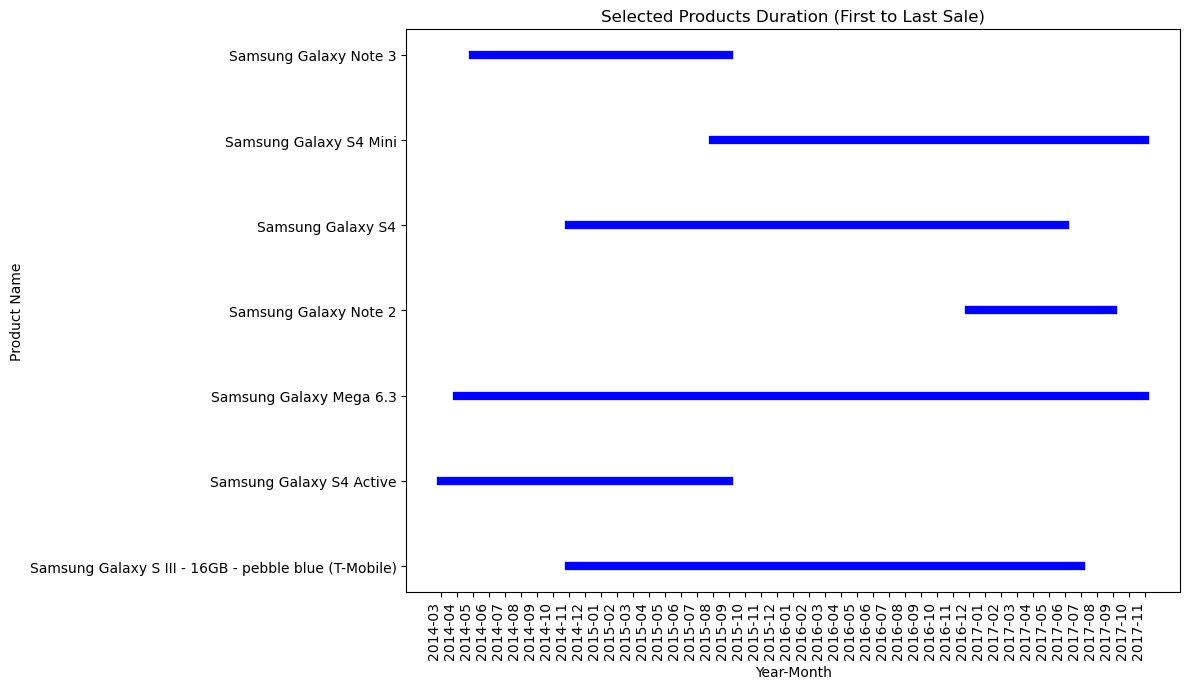

In [9]:
# use dataframe df. Select only those product_id which include 'Xerox' in the product_name
# Then select for each product_id the year&month (format: YYYY-MM) of first entry in order_date and year&month of the last entry in order_date
# Then create a graphical presentation of the date in the following format:
# Y-Axis shows the product name
# X-Axis shows the year&month starting from the first entry in order_date until the last entry in order_date
# the duration between first month and last month for each product_id should be a thick straight line 
# start with the product name that has the earliest entry in first year&month and end with the product name that has the latest entry as first year&month


# Filter dataframe for specific product names
selected_products = [
    "Samsung Galaxy S4",
    "Samsung Galaxy S4 Active",
    "Samsung Galaxy S4 Mini",
    "Samsung Galaxy Note 2",
    "Samsung Galaxy Mega 6.3",
    "Samsung Galaxy S III - 16GB - pebble blue (T-Mobile)",
    "Samsung Galaxy Note 3",
   ]

# Filter dataframe for the selected product names
selected_products_summary = df[df['product_name'].isin(selected_products)].groupby('product_id').agg(
    product_name=('product_name', 'first'),
    first_year_month=('order_date', lambda x: x.min().strftime('%Y-%m')),
    last_year_month=('order_date', lambda x: x.max().strftime('%Y-%m'))
).reset_index()

# # Sort by the first_year_month
# selected_products_summary = selected_products_summary.sort_values(by='first_year_month')

# Generate the plot
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, len(selected_products_summary) * 1.0))

# Generate a range of months from the earliest to the latest
all_months = pd.date_range(
    start=selected_products_summary['first_year_month'].min() + '-01',
    end=selected_products_summary['last_year_month'].max() + '-01',
    freq='MS'
).strftime('%Y-%m').tolist()

# Map product names to y-axis positions
y_positions = range(len(selected_products_summary))

# Plot the duration for each product_id
for i, row in selected_products_summary.iterrows():
    # Ensure the indices for start and end months are correctly calculated
    try:
        start_idx = all_months.index(row['first_year_month'])
        end_idx = all_months.index(row['last_year_month'])
    except ValueError as e:
        print(f"Error with product {row['product_name']}: {e}")
        continue  # Skip this product if there's an issue with the indices

    # Plot the line for the product at the correct y-axis position
    ax.plot([start_idx, end_idx], [y_positions[i], y_positions[i]], linewidth=6, color='blue')

# Set y-axis labels to product names
ax.set_yticks(y_positions)
ax.set_yticklabels(selected_products_summary['product_name'])

# Set x-axis labels to all months
ax.set_xticks(range(len(all_months)))
ax.set_xticklabels(all_months, rotation=90, ha='right')

# Add labels and title
ax.set_xlabel('Year-Month')
ax.set_ylabel('Product Name')
ax.set_title('Selected Products Duration (First to Last Sale)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [10]:
selected_products_summary

,product_id,product_name,first_year_month,last_year_month
0,TEC-PH-10000560,Samsung Galaxy S III - 16GB - pebble blue (T-M...,2014-11,2017-07
1,TEC-PH-10000730,Samsung Galaxy S4 Active,2014-03,2015-09
2,TEC-PH-10001459,Samsung Galaxy Mega 6.3,2014-04,2017-11
3,TEC-PH-10002200,Samsung Galaxy Note 2,2016-12,2017-09
4,TEC-PH-10002584,Samsung Galaxy S4,2014-11,2017-06
5,TEC-PH-10002624,Samsung Galaxy S4 Mini,2015-08,2017-11
6,TEC-PH-10002680,Samsung Galaxy Note 3,2014-05,2015-09


TITLE XYZ

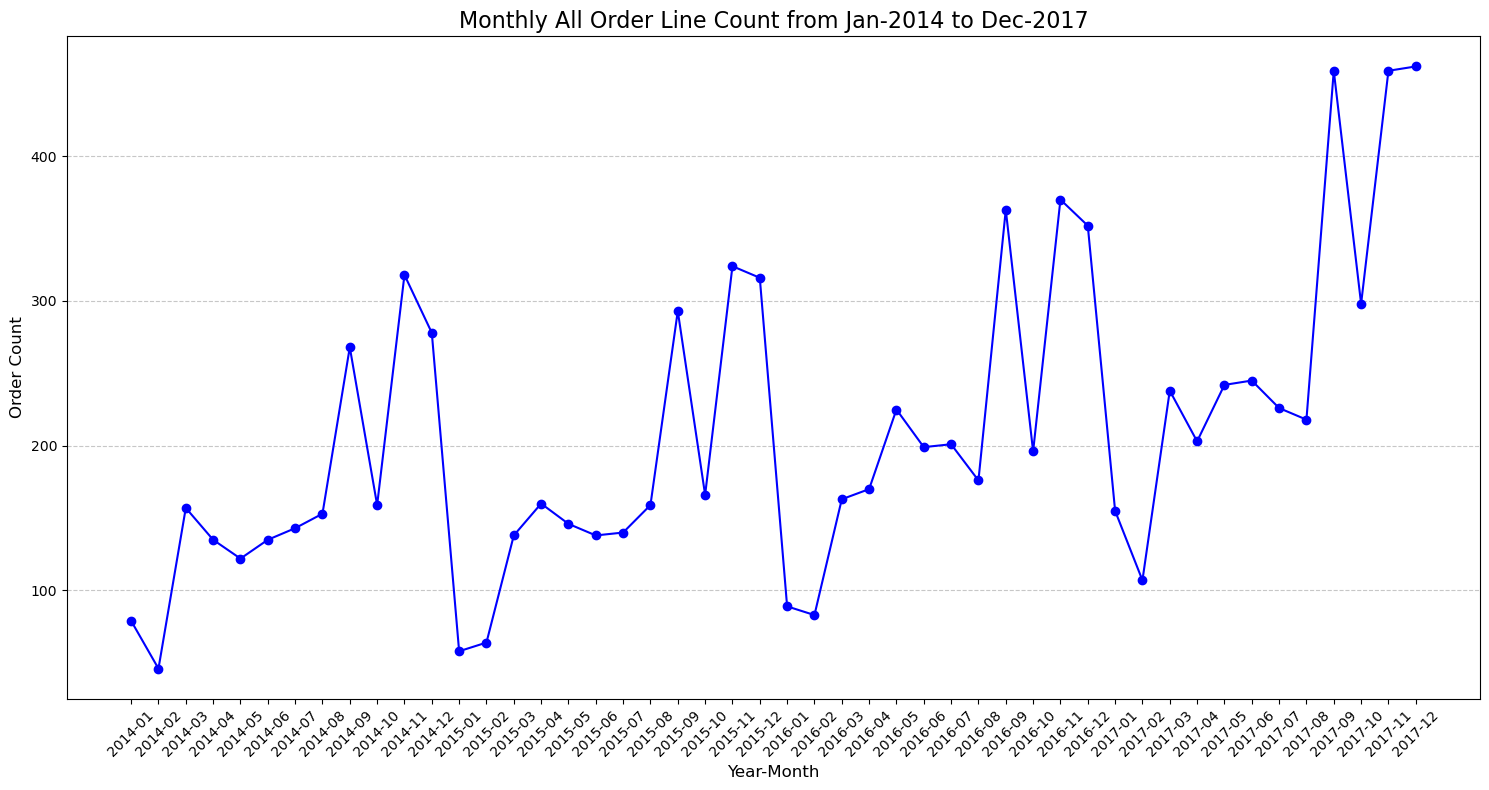

In [11]:
import matplotlib.pyplot as plt


# Group data by year and month, then count orders for each combination
monthly_order_data = df.groupby(['year', 'month'])['row_id'].count().reset_index()

# Create a new column for year-month combination
monthly_order_data['year_month'] = monthly_order_data['year'].astype(str) + '-' + monthly_order_data['month'].astype(str).str.zfill(2)

# Plot the data
plt.figure(figsize=(15, 8))
plt.plot(monthly_order_data['year_month'], monthly_order_data['row_id'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Monthly All Order Line Count from Jan-2014 to Dec-2017', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
# Aggregate Data by Category


# Filter data for the year 2017
df_2017 = df[df['year'] == 2017]

# Aggregate data at the category level
aggregated_cat_df = df_2017.groupby(['category', 'month']).agg(
    profit=('profit', 'sum'),
    sales=('sales', 'sum'),
    row_id=('row_id', 'count'),
    row_id_without_discount=('row_id', lambda x: ((df_2017.loc[x.index, 'discount'] == 0).sum())),
    row_id_with_discount=('row_id', lambda x: ((df_2017.loc[x.index, 'discount'] > 0).sum()))
).reset_index()

# Calculate profit margin
aggregated_cat_df['profit_margin'] = (aggregated_cat_df['profit'] / aggregated_cat_df['sales']) * 100

# check results
aggregated_cat_df

,category,month,profit,sales,row_id,row_id_without_discount,row_id_with_discount,profit_margin
0,Furniture,1,-39.4402,5964.0320,24,13,11,-0.661301
1,Furniture,2,-199.0421,6866.3374,26,8,18,-2.898810
2,Furniture,3,1000.8532,10893.4448,38,19,19,9.187665
3,Furniture,4,202.4624,9065.9581,44,15,29,2.233216
4,Furniture,5,-72.8829,16957.5582,53,23,30,-0.429796
5,Furniture,6,904.9956,19008.5867,51,15,36,4.760983
6,Furniture,7,324.6244,11813.0220,52,24,28,2.748022
7,Furniture,8,322.2390,15441.8740,39,18,21,2.086787
8,Furniture,9,1548.6837,29028.2060,83,30,53,5.335100
9,Furniture,10,-2526.9203,21884.0682,71,24,47,-11.546849


In [13]:
# Aggregate Data by Subcategory

# Filter data for the year 2017
df_2017 = df[df['year'] == 2017]

# Aggregate data at the category level
aggregated_subcat_df = df_2017.groupby(['category', 'subcategory', 'month']).agg(
    profit=('profit', 'sum'),
    sales=('sales', 'sum'),
    row_id=('row_id', 'count'),
    row_id_without_discount=('row_id', lambda x: ((df_2017.loc[x.index, 'discount'] == 0).sum())),
    row_id_with_discount=('row_id', lambda x: ((df_2017.loc[x.index, 'discount'] > 0).sum()))
).reset_index()

# Calculate profit margin
aggregated_subcat_df['profit_margin'] = (aggregated_subcat_df['profit'] / aggregated_subcat_df['sales']) * 100

# check results
aggregated_subcat_df

,category,subcategory,month,profit,sales,row_id,row_id_without_discount,row_id_with_discount,profit_margin
0,Furniture,Bookcases,1,71.9306,297.9200,2,2,0,24.144267
1,Furniture,Bookcases,2,114.8606,1125.7234,5,1,4,10.203270
2,Furniture,Bookcases,3,6.3412,1928.1928,4,1,3,0.328868
3,Furniture,Bookcases,4,27.7790,1978.5036,7,0,7,1.404041
4,Furniture,Bookcases,5,-231.5776,3732.1332,9,3,6,-6.204966
...,...,...,...,...,...,...,...,...,...
196,Technology,Phones,8,1341.2843,10037.5680,17,4,13,13.362642
197,Technology,Phones,9,1448.4239,15318.8360,36,14,22,9.455182
198,Technology,Phones,10,1261.3973,8749.6380,30,7,23,14.416566
199,Technology,Phones,11,2562.6603,17407.1400,44,15,29,14.721892


          category  profit_margin
0        Furniture       1.401379
1  Office Supplies      16.146720
2       Technology      18.652377


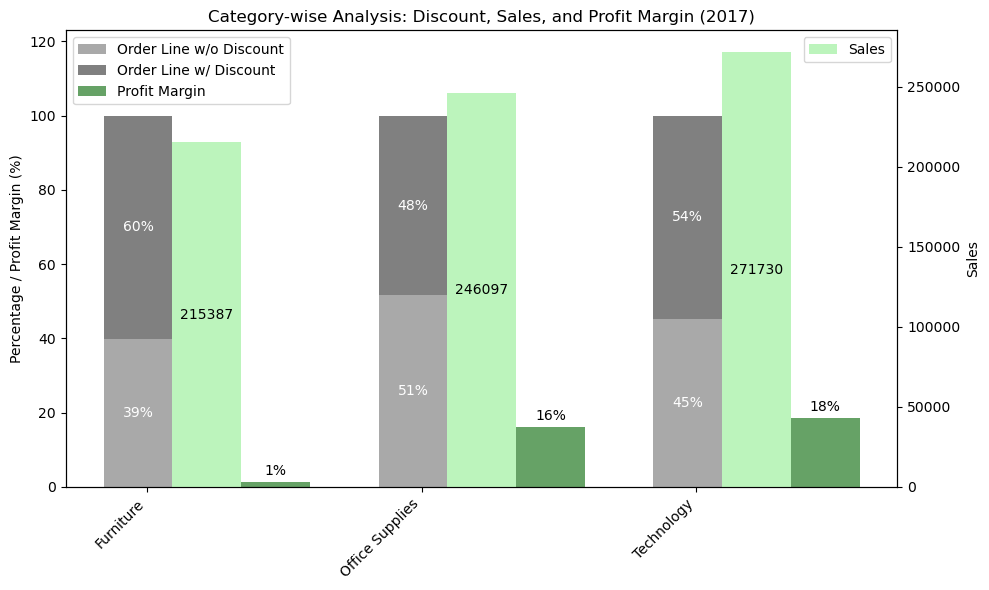

In [14]:
import numpy as np
import matplotlib.pyplot as plt


# Aggregate data at the year and category level
aggregated_yearly = aggregated_cat_df.groupby('category').agg(
    row_id=('row_id', 'sum'),
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum'),
    sales=('sales', 'sum'),
    profit=('profit', 'sum')
).reset_index()

# Calculate profit margin
aggregated_yearly['profit_margin'] = (aggregated_yearly['profit'] / aggregated_yearly['sales']) * 100

# Print the table with calculated profit_margin
print(aggregated_yearly[['category', 'profit_margin']])

# Calculate percentages for stacked bar
aggregated_yearly['without_discount_pct'] = (aggregated_yearly['row_id_without_discount'] / aggregated_yearly['row_id']) * 100
aggregated_yearly['with_discount_pct'] = (aggregated_yearly['row_id_with_discount'] / aggregated_yearly['row_id']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Stacked bar for discount percentages
bar_width = 0.25
categories = aggregated_yearly['category']
x = np.arange(len(categories))

ax1.bar(x, aggregated_yearly['without_discount_pct'], bar_width, label='Order Line w/o Discount', color='darkgrey')
ax1.bar(x, aggregated_yearly['with_discount_pct'], bar_width, bottom=aggregated_yearly['without_discount_pct'], label='Order Line w/ Discount', color='grey')

# Bar 2: Sales on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width, aggregated_yearly['sales'], bar_width, label='Sales', color='lightgreen', alpha=0.6)

# Bar 3: Profit margin on primary y-axis
ax1.bar(x + 2 * bar_width, aggregated_yearly['profit_margin'], bar_width, label='Profit Margin', color='darkgreen', alpha=0.6)

# Customize the plot
bar_width *= 0.25
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(categories, rotation=45, ha='right')
ax1.set_ylabel('Percentage / Profit Margin (%)')
ax2.set_ylabel('Sales')
ax1.set_title('Category-wise Analysis: Discount, Sales, and Profit Margin (2017)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0, 123)
# ax2.set_ylim(0, aggregated_yearly['sales'].max() * 1.2)

# # Add grid lines for better readability
# ax1.yaxis.grid(True, linestyle='--', alpha=0.7)


# Add values inside the bars for discount percentages
for i, category in enumerate(categories):
    ax1.text(x[i], aggregated_yearly['without_discount_pct'][i] / 2, 
             f"{int(aggregated_yearly['without_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10)
    ax1.text(x[i], aggregated_yearly['without_discount_pct'][i] + aggregated_yearly['with_discount_pct'][i] / 2, 
             f"{int(aggregated_yearly['with_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10)

# Add values inside the bars for sales
for i, category in enumerate(categories):
    ax2.text(x[i] + bar_width * 4.0, aggregated_yearly['sales'][i] / 2, 
             f"{int(aggregated_yearly['sales'][i])}", 
             ha='center', va='center', color='black', fontsize=10)

# Add values on top of the bars for profit margin
for i, category in enumerate(categories):
    ax1.text(x[i] + 8.0 * bar_width, aggregated_yearly['profit_margin'][i] + 1, 
             f"{int(aggregated_yearly['profit_margin'][i])}%", 
             ha='center', va='bottom', color='black', fontsize=10)


plt.tight_layout()
plt.show()

   subcategory  profit_margin
0  Accessories      26.144024
1      Copiers      39.796556
2     Machines      -6.589131
3       Phones      12.197894


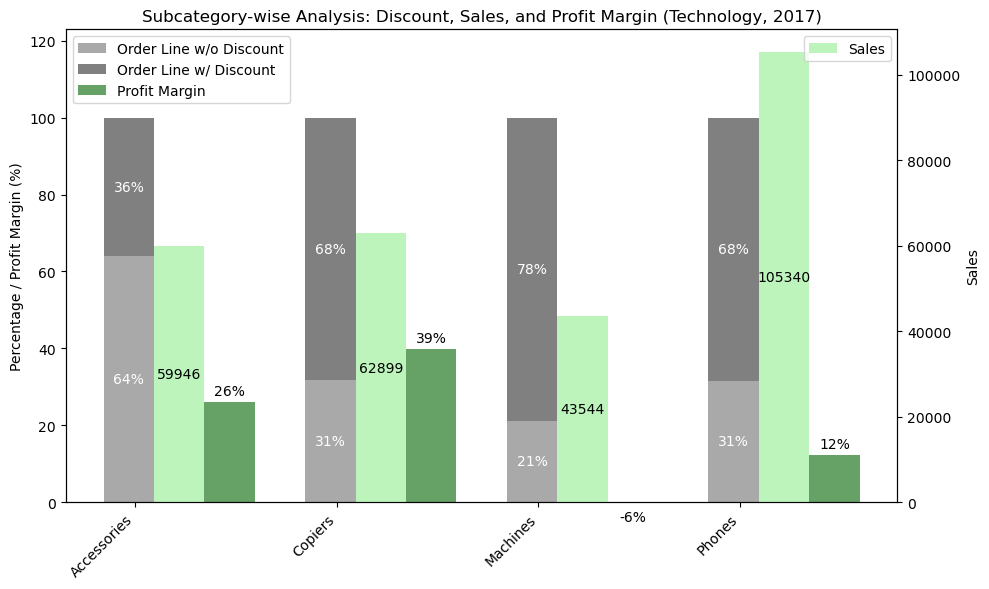

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Limit data to category 'Technology'
technology_data = aggregated_subcat_df[aggregated_subcat_df['category'] == 'Technology']

# Aggregate data at the subcategory level
aggregated_technology = technology_data.groupby('subcategory').agg(
    row_id=('row_id', 'sum'),
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum'),
    sales=('sales', 'sum'),
    profit=('profit', 'sum')
).reset_index()

# Calculate profit margin
aggregated_technology['profit_margin'] = (aggregated_technology['profit'] / aggregated_technology['sales']) * 100

# Print the table with calculated profit_margin
print(aggregated_technology[['subcategory', 'profit_margin']])

# Calculate percentages for stacked bar
aggregated_technology['without_discount_pct'] = (aggregated_technology['row_id_without_discount'] / aggregated_technology['row_id']) * 100
aggregated_technology['with_discount_pct'] = (aggregated_technology['row_id_with_discount'] / aggregated_technology['row_id']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Stacked bar for discount percentages
bar_width = 0.25
subcategories = aggregated_technology['subcategory']
x = np.arange(len(subcategories))

ax1.bar(x, aggregated_technology['without_discount_pct'], bar_width, label='Order Line w/o Discount', color='darkgrey')
ax1.bar(x, aggregated_technology['with_discount_pct'], bar_width, bottom=aggregated_technology['without_discount_pct'], label='Order Line w/ Discount', color='grey')

# Bar 2: Sales on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width, aggregated_technology['sales'], bar_width, label='Sales', color='lightgreen', alpha=0.6)

# Bar 3: Profit margin on primary y-axis
ax1.bar(x + 2 * bar_width, aggregated_technology['profit_margin'], bar_width, label='Profit Margin', color='darkgreen', alpha=0.6)

# Customize the plot
bar_width *= 0.25
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(subcategories, rotation=45, ha='right')
ax1.set_ylabel('Percentage / Profit Margin (%)')
ax2.set_ylabel('Sales')
ax1.set_title('Subcategory-wise Analysis: Discount, Sales, and Profit Margin (Technology, 2017)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0, 123)

# Add values inside the bars for discount percentages
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['without_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10)
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] + aggregated_technology['with_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['with_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10)

# Add values inside the bars for sales
for i, subcategory in enumerate(subcategories):
    ax2.text(x[i] + bar_width * 4.0, aggregated_technology['sales'][i] / 2, 
             f"{int(aggregated_technology['sales'][i])}", 
             ha='center', va='center', color='black', fontsize=10)

# Add values on top of the bars for profit margin
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i] + 8.0 * bar_width, aggregated_technology['profit_margin'][i] + 1, 
             f"{int(aggregated_technology['profit_margin'][i])}%", 
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


  subcategory  profit_margin
0  Appliances      18.322456
1         Art      25.069909
2     Binders      10.537090
3   Envelopes      42.673595
4   Fasteners      35.558656
5      Labels      45.182898
6       Paper      43.477039
7     Storage      10.624360
8    Supplies      -5.952323


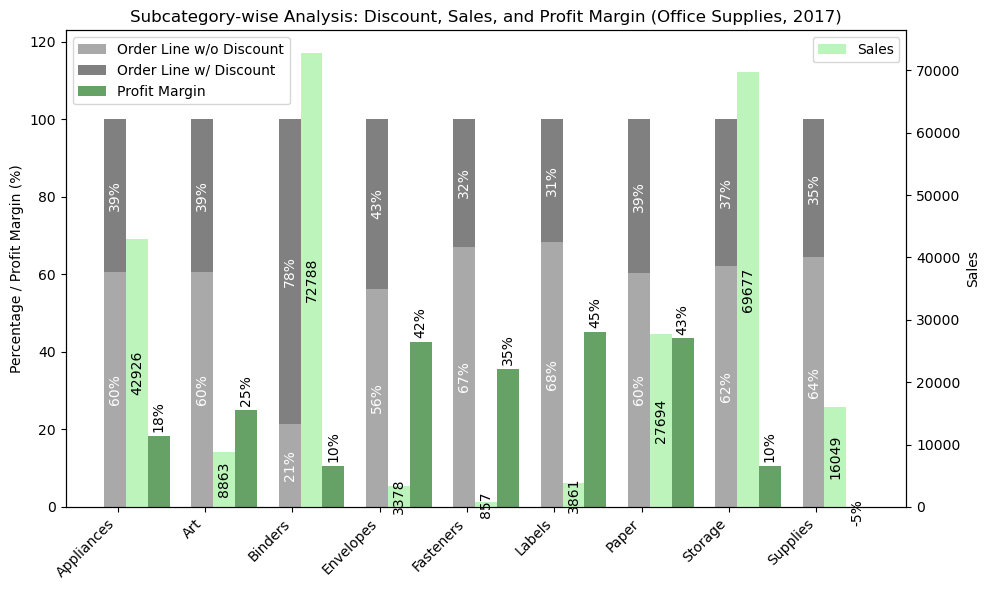

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Limit data to category 'Office Supplies'
technology_data = aggregated_subcat_df[aggregated_subcat_df['category'] == 'Office Supplies']

# Aggregate data at the subcategory level
aggregated_technology = technology_data.groupby('subcategory').agg(
    row_id=('row_id', 'sum'),
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum'),
    sales=('sales', 'sum'),
    profit=('profit', 'sum')
).reset_index()

# Calculate profit margin
aggregated_technology['profit_margin'] = (aggregated_technology['profit'] / aggregated_technology['sales']) * 100

# Print the table with calculated profit_margin
print(aggregated_technology[['subcategory', 'profit_margin']])

# Calculate percentages for stacked bar
aggregated_technology['without_discount_pct'] = (aggregated_technology['row_id_without_discount'] / aggregated_technology['row_id']) * 100
aggregated_technology['with_discount_pct'] = (aggregated_technology['row_id_with_discount'] / aggregated_technology['row_id']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Stacked bar for discount percentages
bar_width = 0.25
subcategories = aggregated_technology['subcategory']
x = np.arange(len(subcategories))

ax1.bar(x, aggregated_technology['without_discount_pct'], bar_width, label='Order Line w/o Discount', color='darkgrey')
ax1.bar(x, aggregated_technology['with_discount_pct'], bar_width, bottom=aggregated_technology['without_discount_pct'], label='Order Line w/ Discount', color='grey')

# Bar 2: Sales on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width, aggregated_technology['sales'], bar_width, label='Sales', color='lightgreen', alpha=0.6)

# Bar 3: Profit margin on primary y-axis
ax1.bar(x + 2 * bar_width, aggregated_technology['profit_margin'], bar_width, label='Profit Margin', color='darkgreen', alpha=0.6)

# Customize the plot
bar_width *= 0.25
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(subcategories, rotation=45, ha='right')
ax1.set_ylabel('Percentage / Profit Margin (%)')
ax2.set_ylabel('Sales')
ax1.set_title('Subcategory-wise Analysis: Discount, Sales, and Profit Margin (Office Supplies, 2017)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0, 123)

# Add values inside the bars for discount percentages
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['without_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10, rotation=90)
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] + aggregated_technology['with_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['with_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10, rotation=90)

# Add values inside the bars for sales
for i, subcategory in enumerate(subcategories):
    ax2.text(x[i] + bar_width * 4.0, aggregated_technology['sales'][i] / 2, 
             f"{int(aggregated_technology['sales'][i])}", 
             ha='center', va='center', color='black', fontsize=10, rotation=90)

# Add values on top of the bars for profit margin
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i] + 8.0 * bar_width, aggregated_technology['profit_margin'][i] + 1, 
             f"{int(aggregated_technology['profit_margin'][i])}%", 
             ha='center', va='bottom', color='black', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()


   subcategory  profit_margin
0    Bookcases      -1.943847
1       Chairs       7.999164
2  Furnishings      14.176550
3       Tables     -13.368732


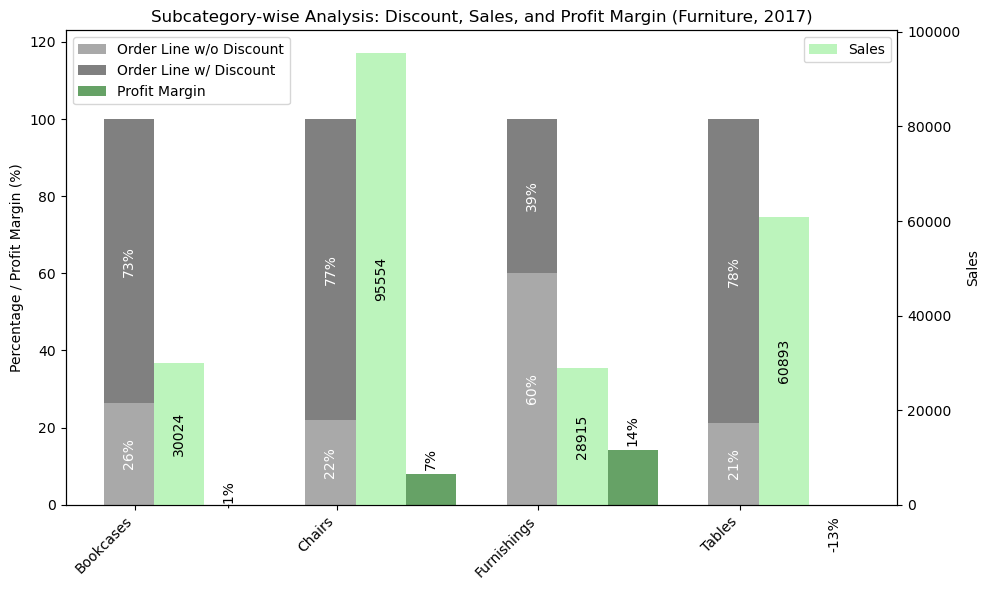

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Limit data to category 'Furniture'
technology_data = aggregated_subcat_df[aggregated_subcat_df['category'] == 'Furniture']

# Aggregate data at the subcategory level
aggregated_technology = technology_data.groupby('subcategory').agg(
    row_id=('row_id', 'sum'),
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum'),
    sales=('sales', 'sum'),
    profit=('profit', 'sum')
).reset_index()

# Calculate profit margin
aggregated_technology['profit_margin'] = (aggregated_technology['profit'] / aggregated_technology['sales']) * 100

# Print the table with calculated profit_margin
print(aggregated_technology[['subcategory', 'profit_margin']])

# Calculate percentages for stacked bar
aggregated_technology['without_discount_pct'] = (aggregated_technology['row_id_without_discount'] / aggregated_technology['row_id']) * 100
aggregated_technology['with_discount_pct'] = (aggregated_technology['row_id_with_discount'] / aggregated_technology['row_id']) * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar 1: Stacked bar for discount percentages
bar_width = 0.25
subcategories = aggregated_technology['subcategory']
x = np.arange(len(subcategories))

ax1.bar(x, aggregated_technology['without_discount_pct'], bar_width, label='Order Line w/o Discount', color='darkgrey')
ax1.bar(x, aggregated_technology['with_discount_pct'], bar_width, bottom=aggregated_technology['without_discount_pct'], label='Order Line w/ Discount', color='grey')

# Bar 2: Sales on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width, aggregated_technology['sales'], bar_width, label='Sales', color='lightgreen', alpha=0.6)

# Bar 3: Profit margin on primary y-axis
ax1.bar(x + 2 * bar_width, aggregated_technology['profit_margin'], bar_width, label='Profit Margin', color='darkgreen', alpha=0.6)

# Customize the plot
bar_width *= 0.25
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(subcategories, rotation=45, ha='right')
ax1.set_ylabel('Percentage / Profit Margin (%)')
ax2.set_ylabel('Sales')
ax1.set_title('Subcategory-wise Analysis: Discount, Sales, and Profit Margin (Furniture, 2017)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0, 123)

# Add values inside the bars for discount percentages
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['without_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10, rotation=90)
    ax1.text(x[i], aggregated_technology['without_discount_pct'][i] + aggregated_technology['with_discount_pct'][i] / 2, 
             f"{int(aggregated_technology['with_discount_pct'][i])}%", 
             ha='center', va='center', color='white', fontsize=10, rotation=90)

# Add values inside the bars for sales
for i, subcategory in enumerate(subcategories):
    ax2.text(x[i] + bar_width * 4.0, aggregated_technology['sales'][i] / 2, 
             f"{int(aggregated_technology['sales'][i])}", 
             ha='center', va='center', color='black', fontsize=10, rotation=90)

# Add values on top of the bars for profit margin
for i, subcategory in enumerate(subcategories):
    ax1.text(x[i] + 8.0 * bar_width, aggregated_technology['profit_margin'][i] + 1, 
             f"{int(aggregated_technology['profit_margin'][i])}%", 
             ha='center', va='bottom', color='black', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()


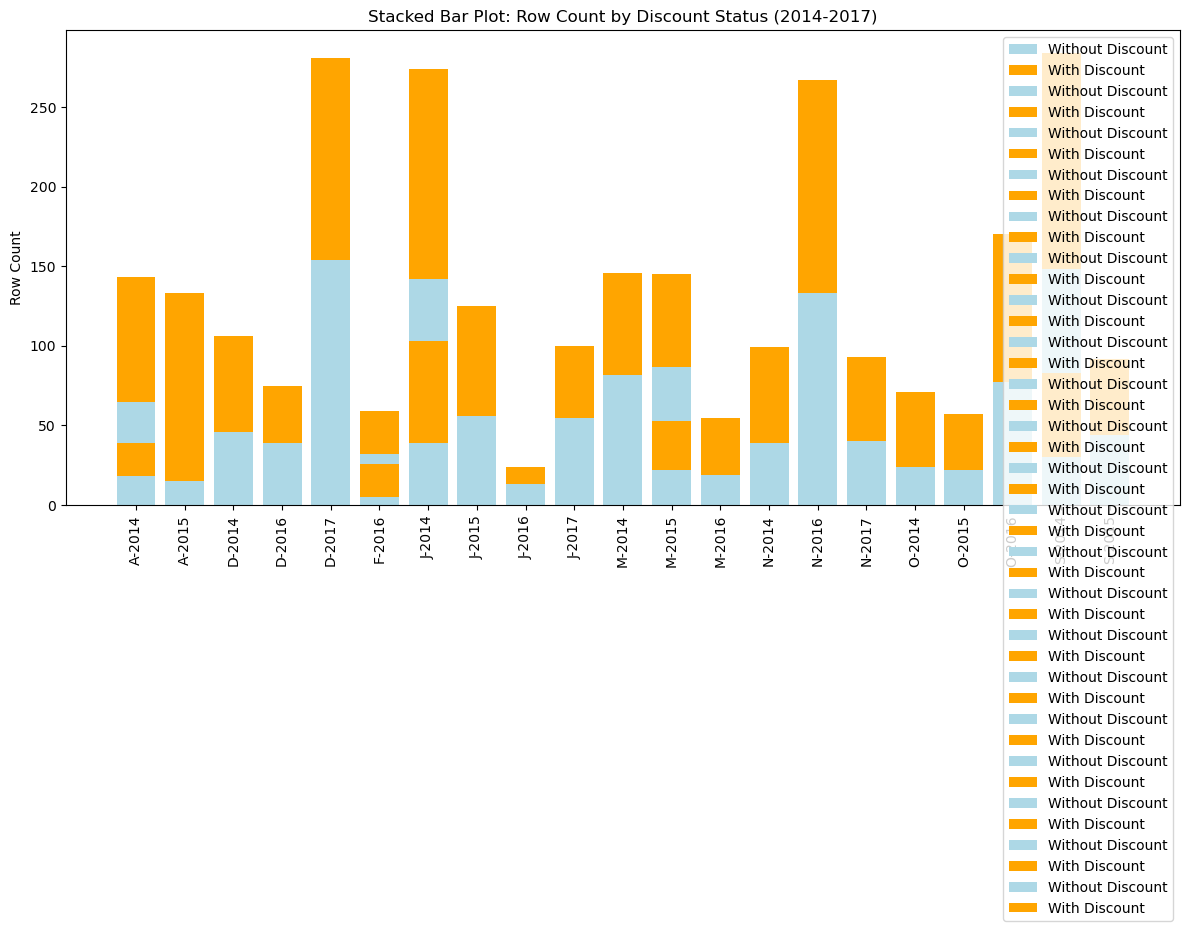

In [18]:
# Limit data in aggregated_df to category 'Furniture' and year 2017

import calendar

import matplotlib.pyplot as plt

# Ensure the 'year' column exists in aggregated_df
if 'year' not in aggregated_cat_df.columns:
    aggregated_cat_df['year'] = df['order_date'].dt.year

# Create a new column for month abbreviation
aggregated_cat_df['month_abbr'] = aggregated_cat_df['month'].apply(lambda x: calendar.month_abbr[x][0])

# Create a new column for year-month combination in the format 'Jan-2014', 'Feb-2014', etc.
aggregated_cat_df['year_month'] = aggregated_cat_df['month_abbr'] + '-' + aggregated_cat_df['year'].astype(str)

# Ensure that the combination of 'year_month' and 'category' is unique
aggregated_cat_df['unique_key'] = aggregated_cat_df['year_month'] + '-' + aggregated_cat_df['category']

# Aggregate data to ensure uniqueness before pivoting
aggregated_unique = aggregated_cat_df.groupby(['year_month', 'category']).agg(
    row_id_without_discount=('row_id_without_discount', 'sum'),
    row_id_with_discount=('row_id_with_discount', 'sum')
).reset_index()

# Pivot the data to get the values for each unique key
pivot_data = aggregated_unique.pivot(index='year_month', columns='category', values=['row_id_without_discount', 'row_id_with_discount'])

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each year-month and plot the stacked bars
for i, (year_month, row) in enumerate(pivot_data.iterrows()):
    ax.bar(i, row['row_id_without_discount'], label='Without Discount', color='lightblue')
    ax.bar(i, row['row_id_with_discount'], bottom=row['row_id_without_discount'], label='With Discount', color='orange')

# Customize the plot
ax.set_xticks(range(len(pivot_data)))
ax.set_xticklabels(pivot_data.index, rotation=90)
ax.set_ylabel('Row Count')
ax.set_title('Stacked Bar Plot: Row Count by Discount Status (2014-2017)')
ax.legend()

plt.tight_layout()
plt.show()

# Not happy with result. I want to see 48 months on the x-Axis and not 4 years.
# I want to see the months in the format 'Jan-2014', 'Feb-2014', ..., 'Dec-2017' on the x-Axis



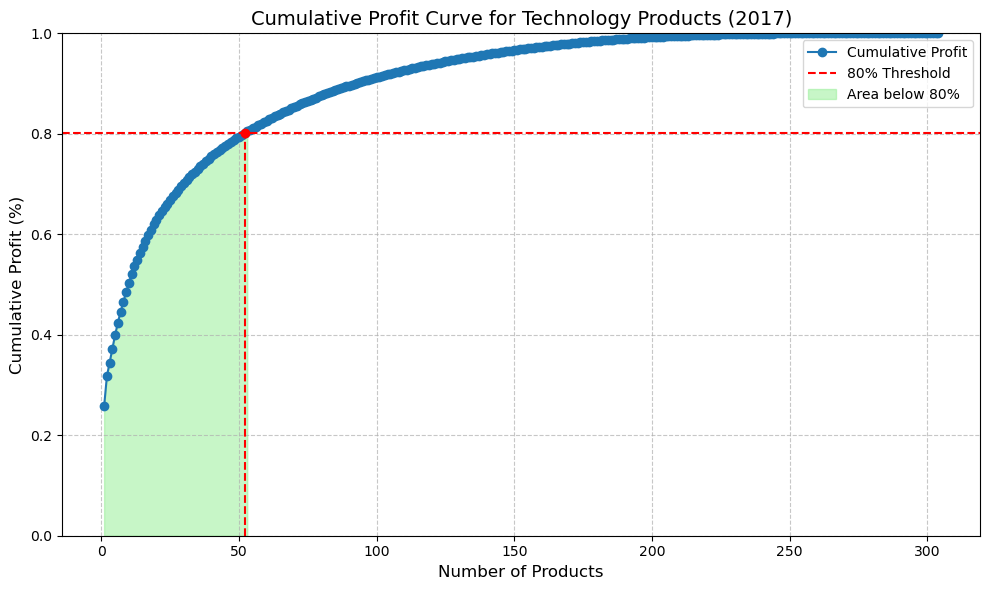

In [19]:
# Show Pareto Chart for Technology Products


# Filter data for the year 2017 and category 'Technology'
technology_data = df_2017[df_2017['category'] == 'Technology']

# Aggregate data at product_id level
aggregated_technology = technology_data.groupby('product_id').agg(
    profit=('profit', 'sum')
).reset_index()

# Sort product_id by descending order of profit
aggregated_technology = aggregated_technology.sort_values(by='profit', ascending=False)

# Default negative profits to zero
aggregated_technology['profit'] = aggregated_technology['profit'].apply(lambda x: max(x, 0))

# Calculate cumulative profit
aggregated_technology['cumulative_profit'] = aggregated_technology['profit'].cumsum()

# Calculate cumulative profit as a percentage of total profit
total_profit = aggregated_technology['profit'].sum()
aggregated_technology['cumulative_profit_pct'] = aggregated_technology['cumulative_profit'] / total_profit

# Generate a table showing product_id, profit, cumulative profit, and cumulative profit percentage
profit_table = aggregated_technology[['product_id', 'profit', 'cumulative_profit', 'cumulative_profit_pct']]

# Display the table sorted in descending order by profit
profit_table_sorted = profit_table.sort_values(by='profit', ascending=False)
profit_table_sorted.reset_index(drop=True, inplace=True)
profit_table_sorted

# Find the point where cumulative profit reaches 80%
threshold_index = aggregated_technology[aggregated_technology['cumulative_profit_pct'] >= 0.8].index[0]
x_threshold = profit_table_sorted[profit_table_sorted['cumulative_profit_pct'] >= 0.8].index[0] + 1  # Adding 1 to convert index to count of products

# Get the corresponding cumulative profit percentage at the threshold
y_threshold = aggregated_technology.loc[threshold_index, 'cumulative_profit_pct']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(aggregated_technology) + 1), aggregated_technology['cumulative_profit_pct'], marker='o', label='Cumulative Profit')

# Add vertical and horizontal lines at the 80% threshold
plt.axhline(y=y_threshold, color='r', linestyle='--', label='80% Threshold')
plt.axvline(x=x_threshold, color='r', linestyle='--', ymax=y_threshold)
plt.scatter(x_threshold, y_threshold, color='red', zorder=5)  # Highlight the intersection point

# Fill the area below the curve up to the 80% threshold
plt.fill_between(range(1, len(aggregated_technology) + 1), 
                 aggregated_technology['cumulative_profit_pct'], 
                 where=(range(1, len(aggregated_technology) + 1) <= x_threshold + 1), 
                 color='lightgreen', alpha=0.5, label='Area below 80%')

# Customize the plot
plt.title('Cumulative Profit Curve for Technology Products (2017)', fontsize=14)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Cumulative Profit (%)', fontsize=12)
plt.ylim(0.0, 1.0)  # Set Y-Axis range from 0.0 to 1.0
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
profit_table_sorted

,product_id,profit,cumulative_profit,cumulative_profit_pct
0,TEC-CO-10004722,15679.9552,15679.9552,0.257473
1,TEC-CO-10001449,3623.9396,19303.8948,0.316980
2,TEC-CO-10003236,1691.9718,20995.8666,0.344763
3,TEC-CO-10001046,1679.9760,22675.8426,0.372349
4,TEC-MA-10003673,1668.2050,24344.0476,0.399742
...,...,...,...,...
299,TEC-PH-10001433,0.0000,60899.4528,1.000000
300,TEC-PH-10004833,0.0000,60899.4528,1.000000
301,TEC-PH-10003092,0.0000,60899.4528,1.000000
302,TEC-PH-10003800,0.0000,60899.4528,1.000000


In [21]:
x_threshold

52

Activate substraction of obsolete products |  if needed

In [22]:
from datetime import datetime

# create a new column 'product_date_first_sale' at the end of dataframe df and set it to the first sale date of each product_id
df['product_date_first_sale'] = df.groupby('product_id')['order_date'].transform('min')
df['product_date_first_sale'] = pd.to_datetime(df['product_date_first_sale'], format='%Y-%m-%d')


# create a new column 'product_date_last_sale' at the end of dataframe df and set it to the last sale date of each product_id
df['product_date_last_sale'] = df.groupby('product_id')['order_date'].transform('max')
df['product_date_last_sale'] = pd.to_datetime(df['product_date_last_sale'], format='%Y-%m-%d')


# create a new column 'product_selling_days' at the end of dataframe df and set it to the number of days between the first sale date and last sale date of each product_id
df['product_selling_days_f2l'] = (df['product_date_last_sale'] - df['product_date_first_sale']).dt.days


# create a new column 'product_selling_days' at the end of dataframe df and set it to the number of days between the first sale date and last sale date of each product_id
df['product_selling_days_f2l_l'] = df.apply(
    lambda row: (row['product_date_last_sale'] - row['product_date_first_sale']).days 
    if row['product_date_last_sale'] != row['product_date_first_sale'] 
    else (min((row['product_date_last_sale'] - row['product_date_first_sale']).days, 180)), 
    axis=1
)


# Assumption: which means 6 months no sales -> product is not selling anymore, i might want to define this by 
# by category at least. in Technology products might become obsolete much quicker.


# Count each occurrence of product_id in the dataframe df and set it to the new column 'product_count'
df['count_orders'] = df.groupby(['product_id', 'order_id'])['order_id'].transform('nunique')
df['count_orders'] = df.groupby('product_id')['count_orders'].transform('sum')


# Count with discounts only
df['count_orders_discount'] = df.apply(
    lambda row: 1 if row['discount'] > 0 else 0, axis=1
)
df['count_orders_discount'] = df.groupby('product_id')['count_orders_discount'].transform('sum')


# add a new columns with calculation by product_id ('count_orders_discount') / ('count_orders')
df['discount_ratio'] = df['count_orders_discount'] / df['count_orders']


# Create a new column 'days_since_last_sale' after column 'product_selling_days_f2l_l'. Use today's date and last sale date to calculate the number of days since last sale. if no value in last sale date, then use first sale date instead.
today = df['order_date'].max()
df['days_since_last_sale'] = df.apply(
    lambda row: (today - row['product_date_last_sale']).days 
    if pd.notnull(row['product_date_last_sale']) 
    else (today - row['product_date_first_sale']).days, 
    axis=1
)


# add a column 'total_quantity' with total of quantity for all records with same product_id
df['total_quantity'] = df.groupby('product_id')['quantity'].transform('sum')


# add a new column 'total_profit' with total of profit for all records with same product_id
df['total_profit'] = df.groupby('product_id')['profit'].transform('sum')


# create a new dataframe df_product
df_product = df[['product_id', 'product_name', 'category', 'subcategory', 'product_date_first_sale', 'product_date_last_sale',
                 'product_selling_days_f2l', 'product_selling_days_f2l_l', 'days_since_last_sale', 
                 'total_quantity', 'count_orders', 'count_orders_discount', 'discount_ratio', 'total_profit'
                 ]].drop_duplicates()


# Take out all product_id with product last_sale_date in 2014, 2015 or 2016. Save data of removed products in a new df df_obsolete
# df_obsolete = df_product[df_product['product_date_last_sale'].dt.year.isin([2014, 2015, 2016])]
# df_product = df_product[~df_product['product_date_last_sale'].dt.year.isin([2014, 2015, 2016])]

# Attention: this removed 347 SKUs from df_product, ~18% of all products


df_product = df_product.sort_values(by=['product_id'])
df_product = df_product.reset_index(drop=True)
df_product.info()
df_product

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  1894 non-null   object        
 1   product_name                1894 non-null   object        
 2   category                    1894 non-null   object        
 3   subcategory                 1894 non-null   object        
 4   product_date_first_sale     1894 non-null   datetime64[ns]
 5   product_date_last_sale      1894 non-null   datetime64[ns]
 6   product_selling_days_f2l    1894 non-null   int64         
 7   product_selling_days_f2l_l  1894 non-null   int64         
 8   days_since_last_sale        1894 non-null   int64         
 9   total_quantity              1894 non-null   int64         
 10  count_orders                1894 non-null   int64         
 11  count_orders_discount       1894 non-null   int64       

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,2014-05-26,2016-06-04,740,740,574,14,5,3,0.600000,311.1836
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,2014-06-14,2014-08-19,66,66,1229,12,2,0,0.000000,229.9752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,2015-10-23,2016-08-20,302,302,497,8,3,1,0.333333,13.0064
1892,TEC-PH-10004959,Classic Ivory Antiqueï¾ Telephoneï¾ ZL1810,Technology,Phones,2014-11-11,2015-09-03,296,296,849,4,2,1,0.500000,40.1960


In [23]:
# take df_product and calculate for each product_id the average number of orders per month and as new column 'avg_orders_per_month'
df_product['avg_orders_per_month'] = df_product.apply(
    lambda row: (row['count_orders'] / 4) if (today - row['product_date_first_sale']).days < 120 
    else row['count_orders'] / ((today - row['product_date_first_sale']).days / 30),
    axis=1
)

df_product[df_product['avg_orders_per_month'] >= 0.]

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,avg_orders_per_month
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820,0.250000
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,0.079787
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,2014-05-26,2016-06-04,740,740,574,14,5,3,0.600000,311.1836,0.114155
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092,0.145161
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,2014-06-14,2014-08-19,66,66,1229,12,2,0,0.000000,229.9752,0.046332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,0.070978
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,0.110051
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,2015-10-23,2016-08-20,302,302,497,8,3,1,0.333333,13.0064,0.112641
1892,TEC-PH-10004959,Classic Ivory Antiqueï¾ Telephoneï¾ ZL1810,Technology,Phones,2014-11-11,2015-09-03,296,296,849,4,2,1,0.500000,40.1960,0.052402


In [24]:
# add a new column 'avg_profit_per_order' (by dividing total profit by count_orders)
df_product['avg_profit_per_order'] = df_product['total_profit'] / df_product['count_orders']

# insert above new column 'avg_profit_per_order' after column 'total_profit'
df_product.insert(df_product.columns.get_loc('total_profit') + 1, 'avg_profit_per_order', df_product.pop('avg_profit_per_order'))

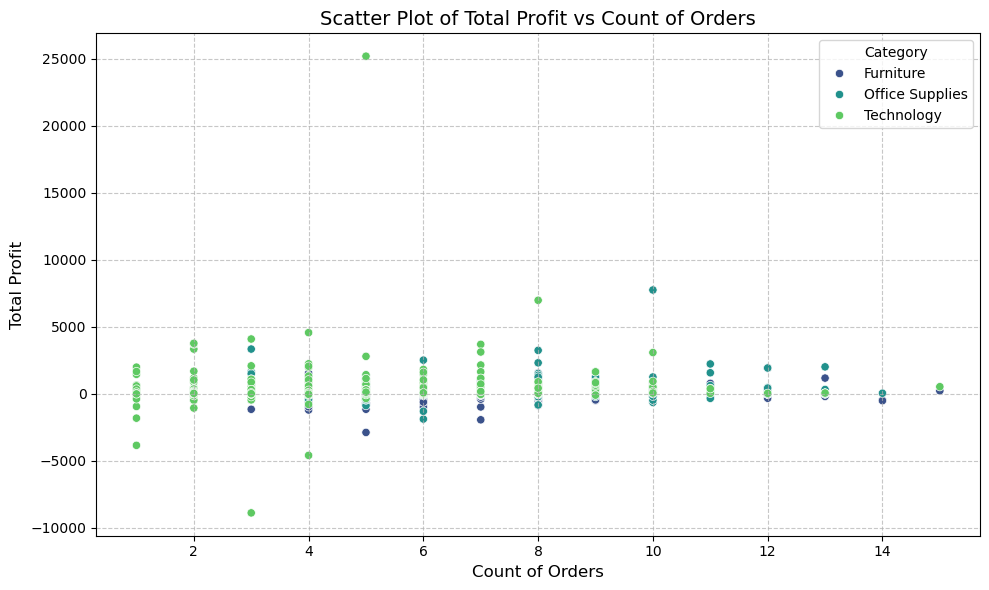

In [25]:
import seaborn as sns

# Prepare a scatter plot with the following columns:
# count_orders (x-Axis)
# total_profit (y-Axis)
# hue = category

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_product, x='count_orders', y='total_profit', hue='category', palette='viridis')

# Customize the plot
plt.title('Scatter Plot of Total Profit vs Count of Orders', fontsize=14)
plt.xlabel('Count of Orders', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


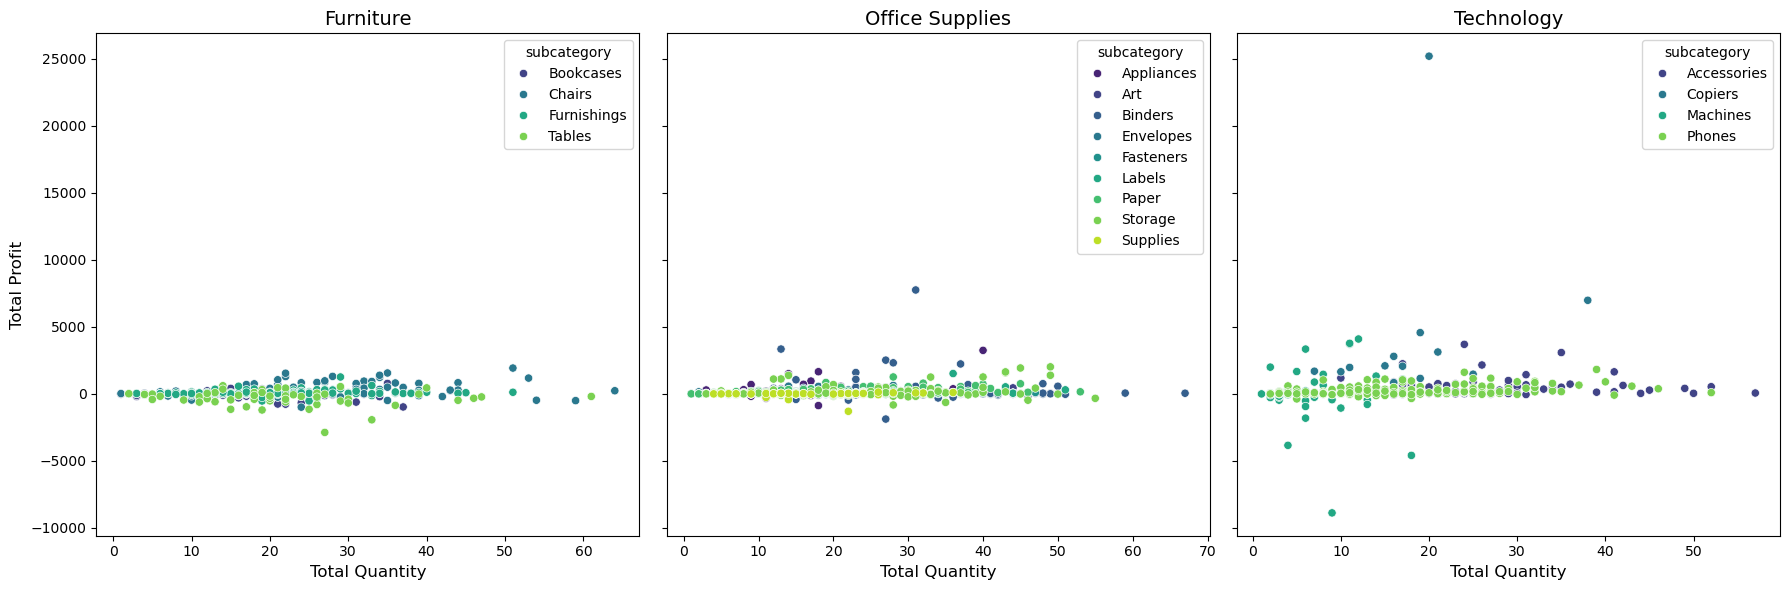

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define the categories
categories = ['Furniture', 'Office Supplies', 'Technology']

# Loop through each category and create a scatter plot
for i, category in enumerate(categories):
    sns.scatterplot(
        data=df_product[df_product['category'] == category],
        x='total_quantity',
        y='total_profit',
        hue='subcategory',
        palette='viridis',
        ax=axes[i]
    )
    axes[i].set_title(f'{category}', fontsize=14)
    axes[i].set_xlabel('Total Quantity', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('Total Profit', fontsize=12)
    else:
        axes[i].set_ylabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

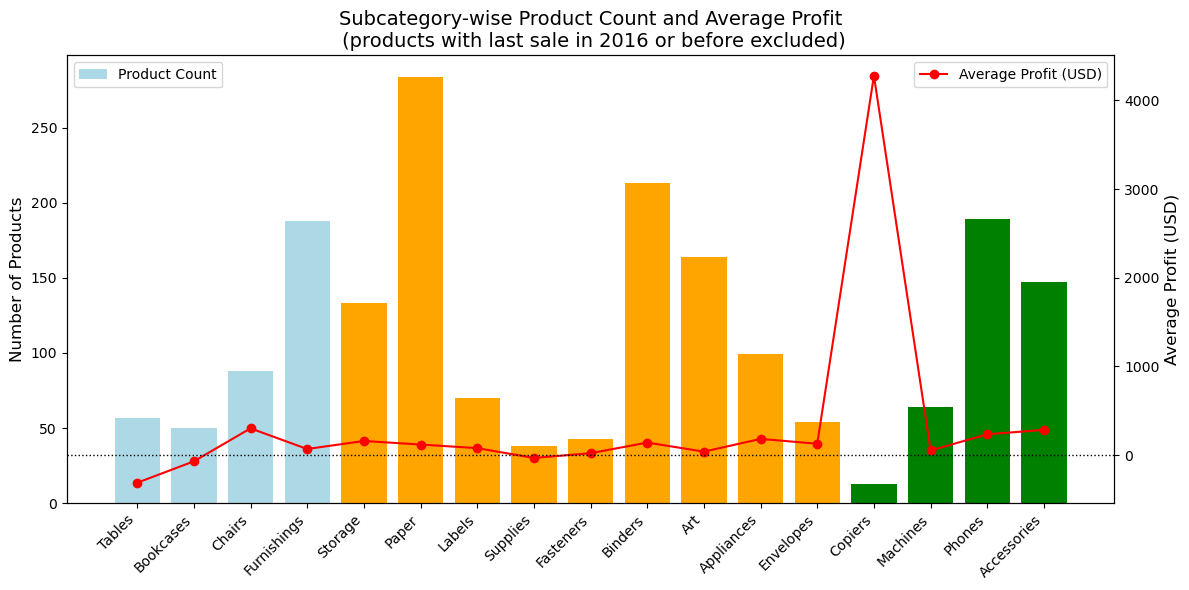

In [27]:
import numpy as np

# Use df_product to calculate the number of products in each subcategory
df_product['subcategory'].value_counts()

# Use df_product to calculate the average profit per product in subcategory
df_product.groupby('subcategory')['total_profit'].mean()

# Show both of the above results in a single plot, value_counts on the left y-Axis and average profit on the right y-Axis
# Start with all subcategories belonging to category 'Furniture', then 'Office_Supplies' and 'Technology'
# When category is changing, then use different color for the bars


import matplotlib.pyplot as plt

# Calculate the number of products in each subcategory
subcategory_counts = df_product['subcategory'].value_counts()

# Calculate the average profit per product in each subcategory
subcategory_avg_profit = df_product.groupby('subcategory')['total_profit'].mean()

# Sort subcategories by category order: Furniture, Office Supplies, Technology
subcategory_order = df_product.groupby('subcategory')['category'].first().sort_values()
subcategory_counts = subcategory_counts[subcategory_order.index]
subcategory_avg_profit = subcategory_avg_profit[subcategory_order.index]

# Define colors for each category
category_colors = {
    'Furniture': 'lightblue',
    'Office Supplies': 'orange',
    'Technology': 'green'
}
subcategory_colors = [category_colors[category] for category in subcategory_order]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for value_counts
x = np.arange(len(subcategory_counts))
ax1.bar(x, subcategory_counts, color=subcategory_colors, label='Product Count')
ax1.set_ylabel('Number of Products', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(subcategory_counts.index, rotation=45, ha='right', fontsize=10)

# Line plot for average profit
ax2 = ax1.twinx()
ax2.plot(x, subcategory_avg_profit, color='red', marker='o', label='Average Profit (USD)')
ax2.set_ylabel('Average Profit (USD)', fontsize=12)
# Add a vertical dotted line at 0 on the right y-Axis
ax2.axhline(0, color='black', linestyle='dotted', linewidth=1)
# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add title
plt.title('Subcategory-wise Product Count and Average Profit\n (products with last sale in 2016 or before excluded)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

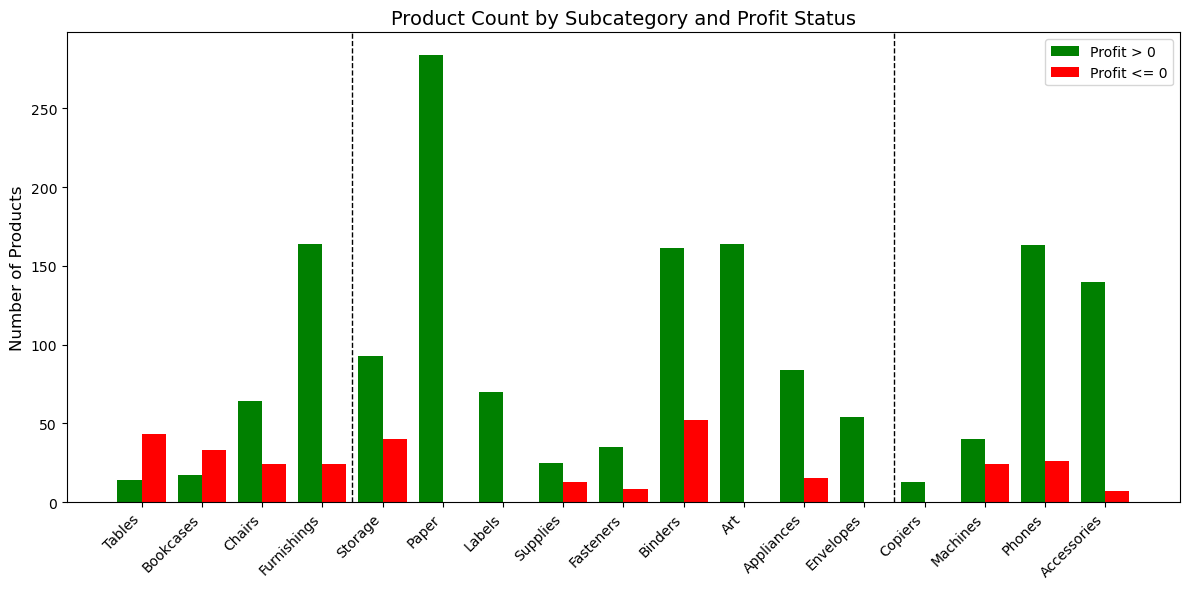

In [28]:
#count number of product_id in df_product which have total_profit > 0
count_positive_profit = df_product[df_product['total_profit'] > 0]['product_id'].nunique()
count_positive_profit

#count number of product_id in df_product which have total_profit <= 0
count_negative_profit = df_product[df_product['total_profit'] <= 0]['product_id'].nunique()
count_negative_profit

# Create a plot which shows by subcategory (in same order as plot direclty above) each time the product_id has a profit > 0 and <= 0
# Calculate counts of product_id with profit > 0 and <= 0 by subcategory
subcategory_positive_profit = df_product[df_product['total_profit'] > 0].groupby('subcategory')['product_id'].nunique()
subcategory_negative_profit = df_product[df_product['total_profit'] <= 0].groupby('subcategory')['product_id'].nunique()

# Ensure the subcategories are in the same order as the previous plot
subcategory_positive_profit = subcategory_positive_profit[subcategory_order.index]
# Ensure the subcategories are grouped by category without reordering
subcategory_negative_profit = subcategory_negative_profit.reindex(subcategory_counts.index)
subcategory_positive_profit = subcategory_positive_profit.reindex(subcategory_counts.index)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for positive and negative profit counts
x = np.arange(len(subcategory_order))
bar_width = 0.4
ax.bar(x - bar_width / 2, subcategory_positive_profit, bar_width, label='Profit > 0', color='green')
ax.bar(x + bar_width / 2, subcategory_negative_profit, bar_width, label='Profit <= 0', color='red')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(subcategory_order.index, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Number of Products', fontsize=12)
ax.set_title('Product Count by Subcategory and Profit Status', fontsize=14)
ax.legend()

# add vertical line between subcategories furnishings and storage and between envelopes and copiers
# Add vertical lines between specified subcategories
ax.axvline(x=3.5, color='black', linestyle='--', linewidth=1)  # Between Furnishings and Storage
ax.axvline(x=12.5, color='black', linestyle='--', linewidth=1)  # Between Envelopes and Copiers


# Show the plot
plt.tight_layout()
plt.show()

In [29]:
df_product

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,avg_profit_per_order,avg_orders_per_month
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820,-117.882000,0.250000
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,8.065333,0.079787
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,2014-05-26,2016-06-04,740,740,574,14,5,3,0.600000,311.1836,62.236720,0.114155
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092,-22.184867,0.145161
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,2014-06-14,2014-08-19,66,66,1229,12,2,0,0.000000,229.9752,114.987600,0.046332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,29.123500,0.070978
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,26.126100,0.110051
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,2015-10-23,2016-08-20,302,302,497,8,3,1,0.333333,13.0064,4.335467,0.112641
1892,TEC-PH-10004959,Classic Ivory Antiqueï¾ Telephoneï¾ ZL1810,Technology,Phones,2014-11-11,2015-09-03,296,296,849,4,2,1,0.500000,40.1960,20.098000,0.052402


Show Age of Product Portfolio  |  by grouping products by their first order

Last value of cumulative growth: 1894


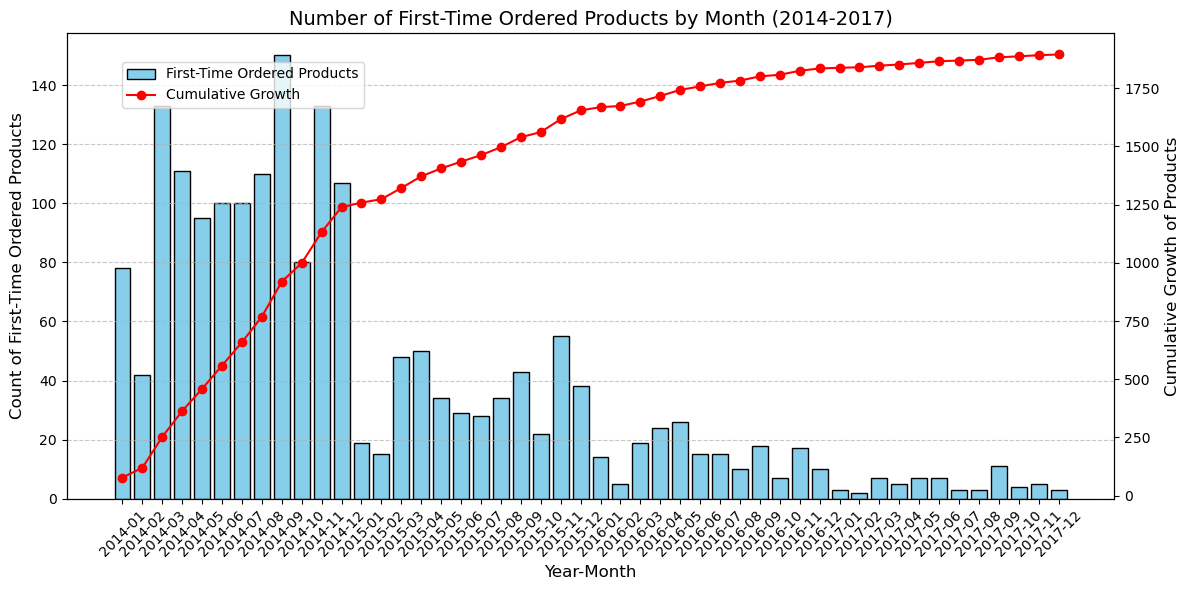

In [30]:
# Use df_product. Count the number of first time ordered products by month from 2014 to 2017
# Create a new column 'first_order_month' to extract the month of the first order date
df_product['first_order_month'] = df_product['product_date_first_sale'].dt.month
# Create a new column 'first_order_year' to extract the year of the first order date
df_product['first_order_year'] = df_product['product_date_first_sale'].dt.year
# Create a new column 'first_order_year_month' to extract the year and month of the first order date
df_product['first_order_year_month'] = df_product['product_date_first_sale'].dt.to_period('M')

# Use the above column and count of respective product_id to generate a histogram profit_table_sorted
# Count the number of first-time ordered products by year and month
first_order_counts = df_product.groupby('first_order_year_month')['product_id'].count()

# Plot the histogram and cumulative growth on the same plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the histogram (bars)
ax1.bar(first_order_counts.index.astype(str), first_order_counts, color='skyblue', edgecolor='black', label='First-Time Ordered Products')
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_ylabel('Count of First-Time Ordered Products', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate cumulative growth of the number of product_id over time
cumulative_growth = first_order_counts.cumsum()

# Print the last value of cumulative_growth
print("Last value of cumulative growth:", cumulative_growth.iloc[-1])

# Plot the cumulative growth (line)
ax2 = ax1.twinx()
ax2.plot(first_order_counts.index.astype(str), cumulative_growth, color='red', linestyle='-', marker='o', label='Cumulative Growth')
ax2.set_ylabel('Cumulative Growth of Products', fontsize=12)

# Add legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Customize the plot
plt.title('Number of First-Time Ordered Products by Month (2014-2017)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Show correlation between Discount and Profit Margin

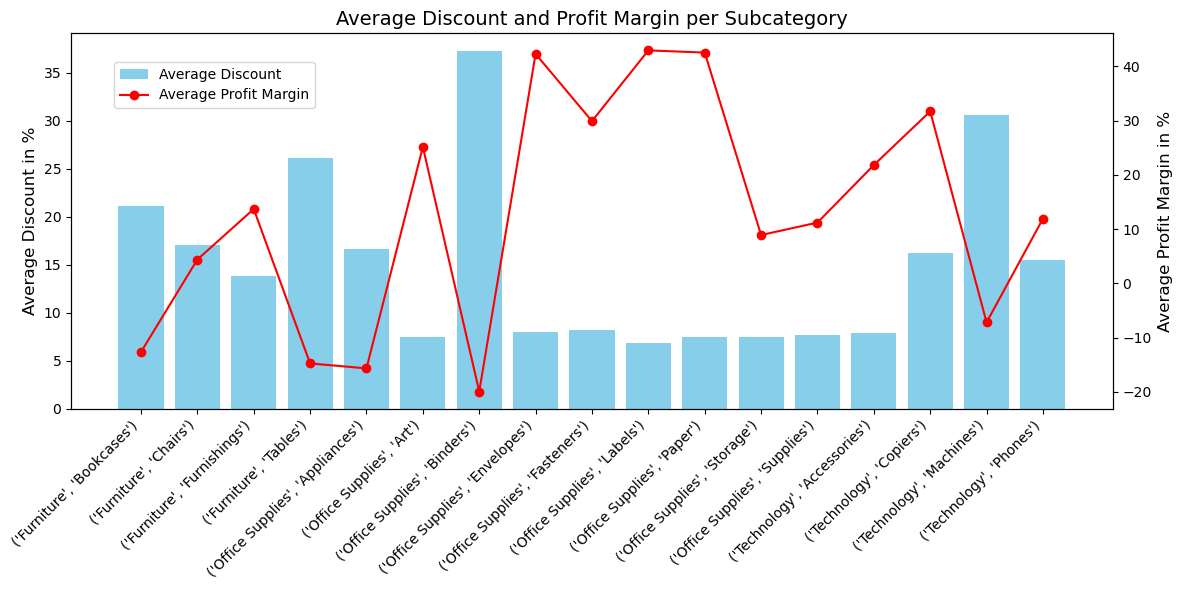

In [31]:
import numpy as np

# Calculate average discount per row_id per subcategory
avg_discount_per_subcategory = df.groupby(['category', 'subcategory'])['discount'].mean() * 100

# Display the result
avg_discount_per_subcategory


# for each line in df divide profit by sales to generate profit margin
df['profit_margin'] = df['profit'] / df['sales']

# Generate average profit margin per subcategory
avg_profit_margin_per_subcategory = df.groupby(['category', 'subcategory'])['profit_margin'].mean() * 100

# Display the result
avg_profit_margin_per_subcategory


# Plot generation, show average discount and profit margin per subcategory in one plot
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average discount
x = np.arange(len(avg_discount_per_subcategory))
ax1.bar(x, avg_discount_per_subcategory, color='skyblue', label='Average Discount')
ax1.set_ylabel('Average Discount in %', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(avg_discount_per_subcategory.index, rotation=45, ha='right', fontsize=10)

# Line plot for average profit margin
ax2 = ax1.twinx()
ax2.plot(x, avg_profit_margin_per_subcategory, color='red', marker='o', label='Average Profit Margin')
ax2.set_ylabel('Average Profit Margin in %', fontsize=12)

# Add legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Add title
plt.title('Average Discount and Profit Margin per Subcategory', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

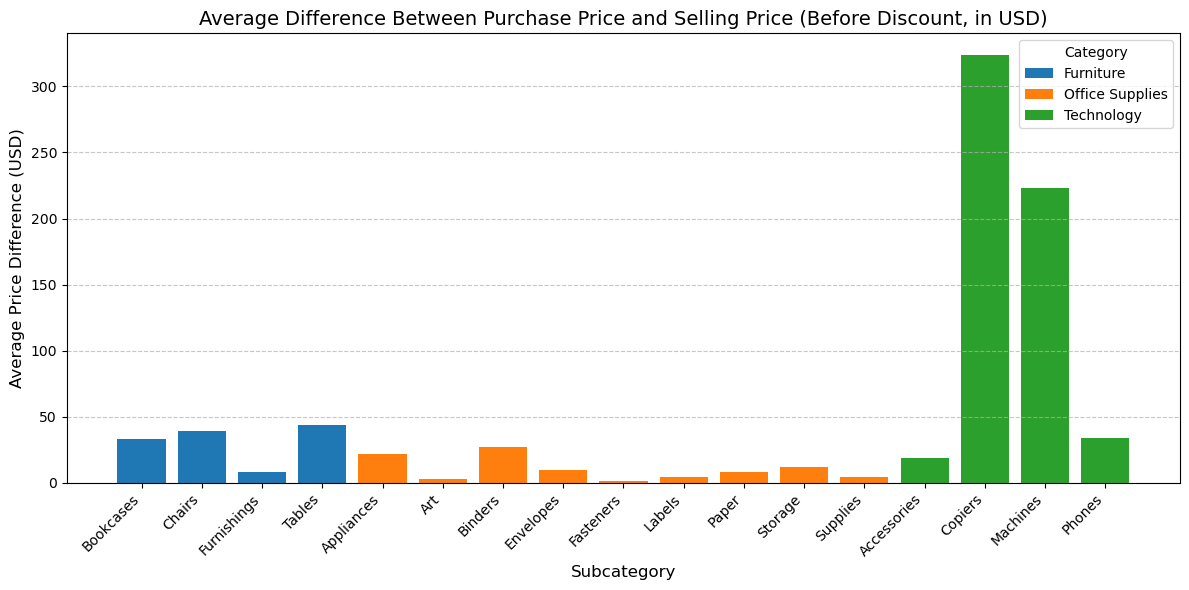

In [32]:
# Use df_product as dataframe
# Calculate average difference between purchase price and selling price before discount
# group by category and subcategory and show as plot

import matplotlib.pyplot as plt

# Calculate the average difference between purchase price and selling price before discount
df['price_difference'] = df['selling_price'] - df['purchase_price']
avg_price_diff = df.groupby(['category', 'subcategory'])['price_difference'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
for category in avg_price_diff['category'].unique():
    subset = avg_price_diff[avg_price_diff['category'] == category]
    plt.bar(subset['subcategory'], subset['price_difference'], label=category)

# Customize the plot
plt.title('Average Difference Between Purchase Price and Selling Price (Before Discount, in USD)', fontsize=14)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Average Price Difference (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


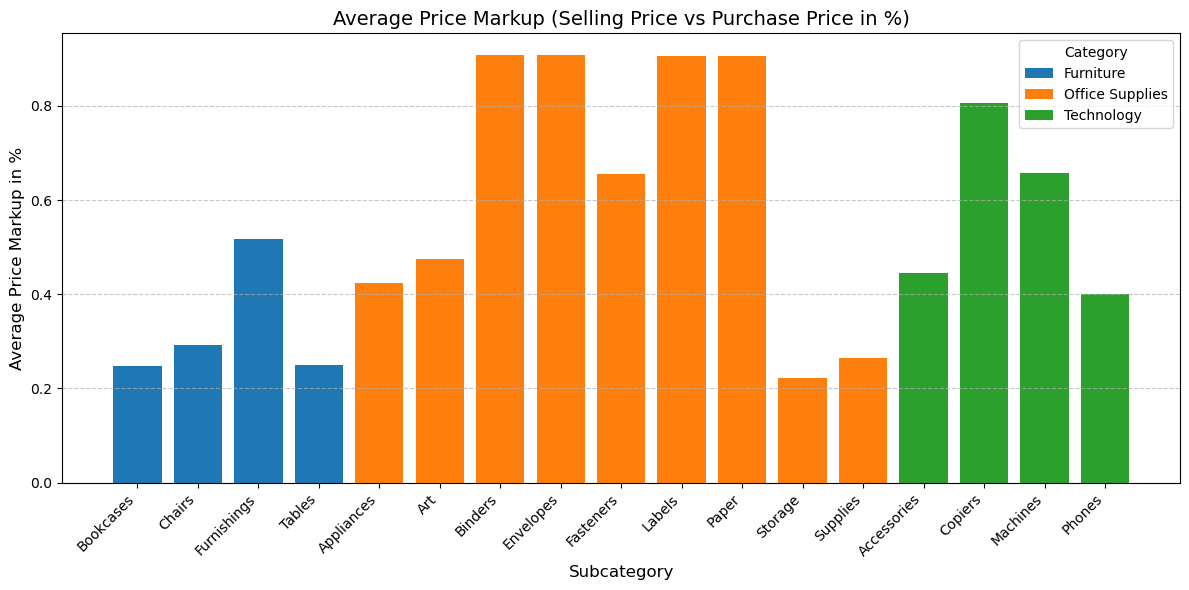

In [33]:
import matplotlib.pyplot as plt

# Calculate the price markup as (selling_price / purchase_price) - 1
df['price_markup'] = (df['selling_price'] / df['purchase_price']) - 1
avg_price_markup = df.groupby(['category', 'subcategory'])['price_markup'].mean().reset_index()


# technically I would have to integrate a weighing factor that takes into account quanity sold


# Plot the results
plt.figure(figsize=(12, 6))
for category in avg_price_markup['category'].unique():
    subset = avg_price_markup[avg_price_markup['category'] == category]
    plt.bar(subset['subcategory'], subset['price_markup'], label=category)

# Customize the plot
plt.title('Average Price Markup (Selling Price vs Purchase Price in %)', fontsize=14)
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Average Price Markup in %', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Transactions per Month

In [34]:
df_product

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,avg_profit_per_order,avg_orders_per_month,first_order_month,first_order_year,first_order_year_month
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820,-117.882000,0.250000,9,2017,2017-09
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,8.065333,0.079787,11,2014,2014-11
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,2014-05-26,2016-06-04,740,740,574,14,5,3,0.600000,311.1836,62.236720,0.114155,5,2014,2014-05
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092,-22.184867,0.145161,8,2014,2014-08
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,2014-06-14,2014-08-19,66,66,1229,12,2,0,0.000000,229.9752,114.987600,0.046332,6,2014,2014-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,29.123500,0.070978,7,2014,2014-07
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,26.126100,0.110051,4,2014,2014-04
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,2015-10-23,2016-08-20,302,302,497,8,3,1,0.333333,13.0064,4.335467,0.112641,10,2015,2015-10
1892,TEC-PH-10004959,Classic Ivory Antiqueï¾ Telephoneï¾ ZL1810,Technology,Phones,2014-11-11,2015-09-03,296,296,849,4,2,1,0.500000,40.1960,20.098000,0.052402,11,2014,2014-11


Product Life Cycle Categorization

PLC Version 1

PLC_Category
1_INTRODUCTION      3
2_GROWTH            5
3_MATURITY        162
4_DECLINE          62
5_OBSOLETE        181
Name: count, dtype: int64


<Axes: title={'center': 'Product Life Cycle Category Distribution'}, xlabel='PLC_Category'>

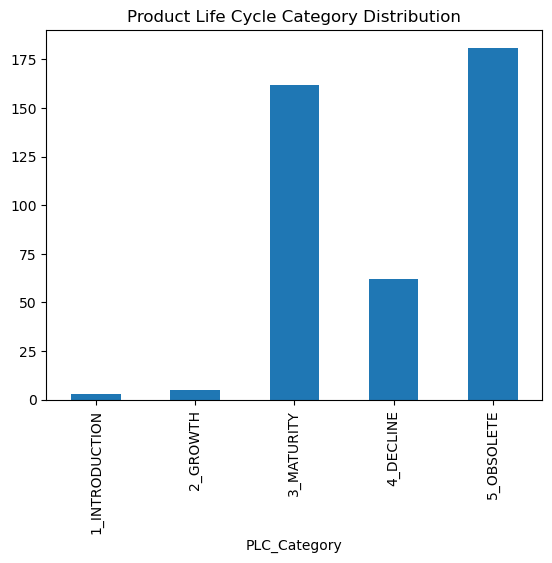

In [35]:
# Creation of Product Life Cycle (PLC) Category

def assign_plc_category(row, today, df):
    # Calculate the difference in days
    days_since_first_sale = (today - row['product_date_first_sale']).days
    days_since_last_sale = (today - row['product_date_last_sale']).days

    # First category: 'INTRODUCTION'
    if days_since_first_sale <= 60:
        return '1_INTRODUCTION'

    # Second category: 'GROWTH'
    if 60 < days_since_first_sale <= 120:
        return '2_GROWTH'

    # Last category: 'OBSOLETE'
    if days_since_last_sale > 150:
        return '5_OBSOLETE'
    
    # Third and Fourth Category: 'MATURITY' and 'DECLINE'
    if days_since_first_sale > 120:
        # Calculate the middle date
        total_days = (row['product_date_last_sale'] - row['product_date_first_sale']).days
        middle_date = row['product_date_first_sale'] + pd.Timedelta(days=total_days // 2)

        # Count unique order_id for period1 (First order date to middle date, inclusive)
        period1_count = df[(df['product_id'] == row['product_id']) & 
                           (df['order_date'] >= row['product_date_first_sale']) & 
                           (df['order_date'] <= middle_date)]['order_id'].nunique()

        # Count unique order_id for period2 (After middle date to last order date, inclusive)
        period2_count = df[(df['product_id'] == row['product_id']) & 
                           (df['order_date'] > middle_date) & 
                           (df['order_date'] <= row['product_date_last_sale'])]['order_id'].nunique()

        # Assign category based on comparison
        if period1_count > period2_count:
            return '4_DECLINE'
        else:
            return '3_MATURITY'
   
    # Default to 'DECLINE' if no other condition is met
    return '4_DECLINE'



# Apply the function to assign PLC_Category
df_product['PLC_Category'] = df_product.apply(assign_plc_category, axis=1, today=today, df=df)

# Limit output in df_product to technology products
df_product_technology = df_product[df_product['category'] == 'Technology']


# Print summary of PLC_Category
print(df_product_technology['PLC_Category'].value_counts().sort_index())


# Create bar chart for PLC_Category
df_product_technology['PLC_Category'].value_counts().sort_index().plot(kind='bar', title='Product Life Cycle Category Distribution')


# Validation in Excel
# Method above correctly assigned PLC_Category

PLC Version 2

In [36]:
# # Creation of Product Life Cycle (PLC) Category

# def assign_plc_category(row, today):
#     # Calculate the difference in days
#     days_since_first_sale = (today - row['product_date_first_sale']).days
#     days_since_last_sale = (today - row['product_date_last_sale']).days

#     # First category: 'INTRODUCTION'
#     if days_since_first_sale <= 60:
#         return '1_INTRODUCTION'

#     # Second category: 'GROWTH'
#     if 60 < days_since_first_sale <= 120:
#         return '2_GROWTH'

#     # Third and Fourth Category: 'MATURITY' and 'DECLINE'
#     if days_since_first_sale > 120:
#         if days_since_last_sale <= 120:
#             # Calculate counts for Period 1 and Period 2
#             period_1_start = row['product_date_last_sale'] - pd.Timedelta(days=120)
#             period_2_start = row['product_date_last_sale'] - pd.Timedelta(days=240)
#             period_1_count = df[(df['product_id'] == row['product_id']) & 
#                                 (df['order_date'] > period_1_start) & 
#                                 (df['order_date'] <= row['product_date_last_sale'])].shape[0]
#             period_2_count = df[(df['product_id'] == row['product_id']) & 
#                                 (df['order_date'] > period_2_start) & 
#                                 (df['order_date'] <= period_1_start)].shape[0] or 0
#             # Check the ratio
#             if period_2_count > 0 and (period_1_count / period_2_count) < 0.666667:
#                 return '4_DECLINE'
#             else:
#                 return '3_MATURITY'

#     # Last category: 'OBSOLETE'
#     if days_since_last_sale > 150:
#         return '5_OBSOLETE'

#     # Default to 'DECLINE' if no other condition is met
#     return '4_DECLINE'



# # Apply the function to assign PLC_Category
# df_product['PLC_Category'] = df_product.apply(assign_plc_category, axis=1, today=today)

# # Limit output in df_product to technology products
# df_product_technology = df_product[df_product['category'] == 'Technology']


# # Create bar chart for PLC_Category
# df_product_technology['PLC_Category'].value_counts().sort_index().plot(kind='bar', title='Product Life Cycle Category Distribution')

Additional Options to illustrate different PLC compositions per category:

--> Show for each of the three main categories as stacked bars
 
--> e.g. : 1_Introduction x %, 2_Growth y %, etc. 

In [37]:
df_product_technology

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,avg_profit_per_order,avg_orders_per_month,first_order_month,first_order_year,first_order_year_month,PLC_Category
1481,TEC-AC-10000023,"Maxell 74 Minute CD-R Spindle, 50/Pack",Technology,Accessories,2014-07-20,2014-11-02,105,105,1154,24,5,0,0.000000,181.1808,36.236160,0.119142,7,2014,2014-07,5_OBSOLETE
1482,TEC-AC-10000057,Microsoft Natural Ergonomic Keyboard 4000,Technology,Accessories,2015-10-03,2017-12-16,805,805,14,19,5,1,0.200000,107.6641,21.532820,0.183150,10,2015,2015-10,3_MATURITY
1483,TEC-AC-10000109,Sony Micro Vault Click 16 GB USB 2.0 Flash Drive,Technology,Accessories,2014-05-09,2017-09-19,1229,1229,102,29,9,4,0.444444,255.3144,28.368267,0.202855,5,2014,2014-05,3_MATURITY
1484,TEC-AC-10000158,Sony 64GB Class 10 Micro SDHC R40 Memory Card,Technology,Accessories,2014-06-23,2017-12-08,1264,1264,22,27,9,3,0.333333,132.0833,14.675922,0.209953,6,2014,2014-06,3_MATURITY
1485,TEC-AC-10000171,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,Technology,Accessories,2015-03-22,2017-09-04,897,897,117,12,5,3,0.600000,91.0404,18.208080,0.147929,3,2015,2015-03,4_DECLINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,29.123500,0.070978,7,2014,2014-07,3_MATURITY
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,26.126100,0.110051,4,2014,2014-04,5_OBSOLETE
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,2015-10-23,2016-08-20,302,302,497,8,3,1,0.333333,13.0064,4.335467,0.112641,10,2015,2015-10,5_OBSOLETE
1892,TEC-PH-10004959,Classic Ivory Antiqueï¾ Telephoneï¾ ZL1810,Technology,Phones,2014-11-11,2015-09-03,296,296,849,4,2,1,0.500000,40.1960,20.098000,0.052402,11,2014,2014-11,5_OBSOLETE


In [38]:
import random

# create a subset of df_product and include 3 example product_id from each category included in 'plc_category'. make sure to select product_id randomly. The only selection critera is that each selected product_id needs to have a count of at least 6 different row_id. the subset of df_product should include new columns which show result of in between steps of calculations in above code set that relate to differentiation between category '3_Mature' and '4_Decline'. I would like to see number of lines within last 120 days of last order date, and number of lines in the 120 days before that period. And the result of the division of the two values. 


# Filter df_product to include only products with at least 6 different row_id
filtered_df_product = df_product_technology[df_product_technology['count_orders'] >= 6]

# Randomly select 3 product_id from each plc_category
sampled_products = filtered_df_product.groupby('PLC_Category').apply(
    lambda group: group.sample(n=min(10, len(group)), random_state=42)
).reset_index(drop=True)

# Add new columns for calculations related to '3_Mature' and '4_Decline'
def calculate_lines(row):
    # Filter rows for the current product_id
    product_data = df[df['product_id'] == row['product_id']]
    
    # Calculate the number of lines within the last 120 days of the last order date
    period_1_start = row['product_date_last_sale'] - pd.Timedelta(days=120)
    period_1_lines = product_data[product_data['order_date'] > period_1_start].shape[0]
    
    # Calculate the number of lines in the 120 days before that period
    period_2_start = period_1_start - pd.Timedelta(days=120)
    period_2_lines = product_data[(product_data['order_date'] > period_2_start) & 
                                  (product_data['order_date'] <= period_1_start)].shape[0]
    
    # Calculate the division of the two values
    division_result = period_1_lines / period_2_lines if period_2_lines > 0 else None
    
    return pd.Series([period_1_lines, period_2_lines, division_result])

# Apply the calculations to the sampled products
sampled_products[['lines_last_120_days', 'lines_prev_120_days', 'division_result']] = sampled_products.apply(
    calculate_lines, axis=1
)

sampled_products

# Have to review result further. First findings:
# 1, 2, 3 and 5 correctly categorized. Found several examples of 4_Decline which are not correct.



C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_8424\1998565679.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_products = filtered_df_product.groupby('PLC_Category').apply(


,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,...,total_profit,avg_profit_per_order,avg_orders_per_month,first_order_month,first_order_year,first_order_year_month,PLC_Category,lines_last_120_days,lines_prev_120_days,division_result
0,TEC-AC-10000682,Kensington K72356US Mouse-in-a-Box USB Desktop...,Technology,Accessories,2015-09-19,2017-11-13,786,786,47,20,...,106.1760,17.696000,0.216086,9,2015,2015-09,3_MATURITY,3.0,0.0,NaN
1,TEC-AC-10004353,Hypercom P1300 Pinpad,Technology,Accessories,2014-03-02,2017-09-03,1281,1281,118,21,...,275.3100,39.330000,0.150107,3,2014,2014-03,3_MATURITY,2.0,0.0,NaN
2,TEC-AC-10001767,SanDisk Ultra 64 GB MicroSDHC Class 10 Memory ...,Technology,Accessories,2014-08-08,2017-11-30,1210,1210,30,25,...,37.9905,6.331750,0.145161,8,2014,2014-08,3_MATURITY,1.0,1.0,1.0
3,TEC-AC-10000109,Sony Micro Vault Click 16 GB USB 2.0 Flash Drive,Technology,Accessories,2014-05-09,2017-09-19,1229,1229,102,29,...,255.3144,28.368267,0.202855,5,2014,2014-05,3_MATURITY,2.0,0.0,NaN
4,TEC-PH-10000347,Cush Cases Heavy Duty Rugged Cover Case for Sa...,Technology,Phones,2015-04-05,2017-12-28,998,998,2,17,...,3.9105,0.651750,0.180000,4,2015,2015-04,3_MATURITY,2.0,1.0,2.0
5,TEC-PH-10001305,Panasonic KX TS208W Corded phone,Technology,Phones,2014-10-19,2017-11-23,1131,1131,37,32,...,154.8084,25.801400,0.154110,10,2014,2014-10,3_MATURITY,1.0,1.0,1.0
6,TEC-PH-10003505,Geemarc AmpliPOWER60,Technology,Phones,2014-05-30,2017-10-30,1249,1249,61,46,...,384.1920,34.926545,0.251908,5,2014,2014-05,3_MATURITY,1.0,2.0,0.5
7,TEC-PH-10001817,Wilson Electronics DB Pro Signal Booster,Technology,Phones,2014-05-10,2017-11-02,1272,1272,58,32,...,515.5200,51.552000,0.225564,5,2014,2014-05,3_MATURITY,3.0,0.0,NaN
8,TEC-PH-10001459,Samsung Galaxy Mega 6.3,Technology,Phones,2014-04-28,2017-11-20,1302,1302,40,39,...,1822.7566,303.792767,0.134128,4,2014,2014-04,3_MATURITY,3.0,0.0,NaN
9,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories,2014-12-14,2017-10-12,1033,1033,79,35,...,3085.0325,308.503250,0.269784,12,2014,2014-12,3_MATURITY,3.0,1.0,3.0


In [39]:
df_product

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,count_orders,count_orders_discount,discount_ratio,total_profit,avg_profit_per_order,avg_orders_per_month,first_order_month,first_order_year,first_order_year_month,PLC_Category
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,2017-09-04,2017-09-04,0,0,117,9,1,1,1.000000,-117.8820,-117.882000,0.250000,9,2017,2017-09,2_GROWTH
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,3,2,0.666667,24.1960,8.065333,0.079787,11,2014,2014-11,5_OBSOLETE
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,2014-05-26,2016-06-04,740,740,574,14,5,3,0.600000,311.1836,62.236720,0.114155,5,2014,2014-05,5_OBSOLETE
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2014-08-08,2017-12-19,1229,1229,11,21,6,3,0.500000,-133.1092,-22.184867,0.145161,8,2014,2014-08,3_MATURITY
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,2014-06-14,2014-08-19,66,66,1229,12,2,0,0.000000,229.9752,114.987600,0.046332,6,2014,2014-06,5_OBSOLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,3,2,0.666667,87.3705,29.123500,0.070978,7,2014,2014-07,3_MATURITY
1890,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,5,3,0.600000,130.6305,26.126100,0.110051,4,2014,2014-04,5_OBSOLETE
1891,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",Technology,Phones,2015-10-23,2016-08-20,302,302,497,8,3,1,0.333333,13.0064,4.335467,0.112641,10,2015,2015-10,5_OBSOLETE
1892,TEC-PH-10004959,Classic Ivory Antiqueï¾ Telephoneï¾ ZL1810,Technology,Phones,2014-11-11,2015-09-03,296,296,849,4,2,1,0.500000,40.1960,20.098000,0.052402,11,2014,2014-11,5_OBSOLETE


In [40]:
# tbd

In [41]:
# export into csv file
os.makedirs('Archive', exist_ok=True)
df_product.to_csv('Archive/product_life_cycle.csv', index=False, encoding='utf-8')


In [42]:
last_order_date = df['order_date'].max()
print("Last order date:", last_order_date)



Last order date: 2017-12-30 00:00:00
